## Setup

In [1]:
topology = 'B'
omission = 'omitExMet'

In [2]:
from scipy.stats import f_oneway
from scipy.stats import kruskal

import pandas as pd
import numpy as np
import tellurium as te

import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import AnovaRM

import scipy as sp

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

import os

import gzip
import cloudpickle

In [3]:
os.chdir('..')
from src import antemll, util
os.chdir('notebooks')

WARNING (aesara.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
WARNING (aesara.configdefaults): g++ not detected!  Aesara will be unable to compile C-implementations and will default to Python. Performance may be severely degraded. To remove this warning, set Aesara flags cxx to an empty string.
WARNING (aesara.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [4]:
ant_noReg ='../models/Antimony/topologyB-noReg.ant' 
ant_reg1 ='../models/Antimony/topologyB-reg1.ant'
ant_reg2 ='../models/Antimony/topologyB-reg2.ant' 

rr_noReg = te.loada(ant_noReg)
rr_noReg.conservedMoietyAnalysis = True
rr_noReg.steadyState()

rr_reg1 = te.loada(ant_reg1)
rr_reg1.conservedMoietyAnalysis = True
rr_reg1.steadyState()

rr_reg2 = te.loada(ant_reg2)
rr_reg2.conservedMoietyAnalysis = True
rr_reg2.steadyState()

gt_noReg = rr_noReg.getScaledElasticityMatrix().ravel()
gt_reg1 = rr_reg1.getScaledElasticityMatrix().ravel()
gt_reg2 = rr_reg2.getScaledElasticityMatrix().ravel()

In [5]:
datafile01_noReg = f'../data/interim/generated_data/Topology{topology}-noReg/Topology{topology}-noReg_0.1.csv'
datafile02_noReg = f'../data/interim/generated_data/Topology{topology}-noReg/Topology{topology}-noReg_0.2.csv'
datafile03_noReg = f'../data/interim/generated_data/Topology{topology}-noReg/Topology{topology}-noReg_0.3.csv'
datafile04_noReg = f'../data/interim/generated_data/Topology{topology}-noReg/Topology{topology}-noReg_0.4.csv'
datafile05_noReg = f'../data/interim/generated_data/Topology{topology}-noReg/Topology{topology}-noReg_0.5.csv'
datafile15_noReg = f'../data/interim/generated_data/Topology{topology}-noReg/Topology{topology}-noReg_1.5.csv'
datafile3_noReg = f'../data/interim/generated_data/Topology{topology}-noReg/Topology{topology}-noReg_3.csv'
datafile5_noReg = f'../data/interim/generated_data/Topology{topology}-noReg/Topology{topology}-noReg_5.csv'
datafile7_noReg = f'../data/interim/generated_data/Topology{topology}-noReg/Topology{topology}-noReg_7.csv'
datafile100_noReg = f'../data/interim/generated_data/Topology{topology}-noReg/Topology{topology}-noReg_10.csv'

datafile01_reg1 = f'../data/interim/generated_data/Topology{topology}-reg1/Topology{topology}-reg1_0.1.csv'
datafile02_reg1 = f'../data/interim/generated_data/Topology{topology}-reg1/Topology{topology}-reg1_0.2.csv'
datafile03_reg1 = f'../data/interim/generated_data/Topology{topology}-reg1/Topology{topology}-reg1_0.3.csv'
datafile04_reg1 = f'../data/interim/generated_data/Topology{topology}-reg1/Topology{topology}-reg1_0.4.csv'
datafile05_reg1 = f'../data/interim/generated_data/Topology{topology}-reg1/Topology{topology}-reg1_0.5.csv'
datafile15_reg1 = f'../data/interim/generated_data/Topology{topology}-reg1/Topology{topology}-reg1_1.5.csv'
datafile3_reg1 = f'../data/interim/generated_data/Topology{topology}-reg1/Topology{topology}-reg1_3.csv'
datafile5_reg1 = f'../data/interim/generated_data/Topology{topology}-reg1/Topology{topology}-reg1_5.csv'
datafile7_reg1 = f'../data/interim/generated_data/Topology{topology}-reg1/Topology{topology}-reg1_7.csv'
datafile100_reg1 = f'../data/interim/generated_data/Topology{topology}-reg1/Topology{topology}-reg1_10.csv'

datafile01_reg2 = f'../data/interim/generated_data/Topology{topology}-reg2/Topology{topology}-reg2_0.1.csv'
datafile02_reg2 = f'../data/interim/generated_data/Topology{topology}-reg2/Topology{topology}-reg2_0.2.csv'
datafile03_reg2 = f'../data/interim/generated_data/Topology{topology}-reg2/Topology{topology}-reg2_0.3.csv'
datafile04_reg2 = f'../data/interim/generated_data/Topology{topology}-reg2/Topology{topology}-reg2_0.4.csv'
datafile05_reg2 = f'../data/interim/generated_data/Topology{topology}-reg2/Topology{topology}-reg2_0.5.csv'
datafile15_reg2 = f'../data/interim/generated_data/Topology{topology}-reg2/Topology{topology}-reg2_1.5.csv'
datafile3_reg2 = f'../data/interim/generated_data/Topology{topology}-reg2/Topology{topology}-reg2_3.csv'
datafile5_reg2 = f'../data/interim/generated_data/Topology{topology}-reg2/Topology{topology}-reg2_5.csv'
datafile7_reg2 = f'../data/interim/generated_data/Topology{topology}-reg2/Topology{topology}-reg2_7.csv'
datafile100_reg2 = f'../data/interim/generated_data/Topology{topology}-reg2/Topology{topology}-reg2_10.csv'


In [6]:
BMCA_obj01_noReg = antemll.antemll(ant_noReg, datafile01_noReg, cobra_sbml=f'../models/sbml/Topology{topology}_cobra.xml')
BMCA_obj02_noReg = antemll.antemll(ant_noReg, datafile02_noReg, cobra_sbml=f'../models/sbml/Topology{topology}_cobra.xml')
BMCA_obj03_noReg = antemll.antemll(ant_noReg, datafile03_noReg, cobra_sbml=f'../models/sbml/Topology{topology}_cobra.xml')
BMCA_obj04_noReg = antemll.antemll(ant_noReg, datafile04_noReg, cobra_sbml=f'../models/sbml/Topology{topology}_cobra.xml')
BMCA_obj05_noReg = antemll.antemll(ant_noReg, datafile05_noReg, cobra_sbml=f'../models/sbml/Topology{topology}_cobra.xml')
BMCA_obj15_noReg = antemll.antemll(ant_noReg, datafile15_noReg, cobra_sbml=f'../models/sbml/Topology{topology}_cobra.xml')
BMCA_obj3_noReg = antemll.antemll(ant_noReg, datafile3_noReg, cobra_sbml=f'../models/sbml/Topology{topology}_cobra.xml')
BMCA_obj5_noReg = antemll.antemll(ant_noReg, datafile5_noReg, cobra_sbml=f'../models/sbml/Topology{topology}_cobra.xml')
BMCA_obj7_noReg = antemll.antemll(ant_noReg, datafile7_noReg, cobra_sbml=f'../models/sbml/Topology{topology}_cobra.xml')
BMCA_obj100_noReg = antemll.antemll(ant_noReg, datafile100_noReg, cobra_sbml=f'../models/sbml/Topology{topology}_cobra.xml')

BMCA_obj01_reg1 = antemll.antemll(ant_reg1, datafile01_reg1, cobra_sbml=f'../models/sbml/Topology{topology}_cobra.xml')
BMCA_obj02_reg1 = antemll.antemll(ant_reg1, datafile02_reg1, cobra_sbml=f'../models/sbml/Topology{topology}_cobra.xml')
BMCA_obj03_reg1 = antemll.antemll(ant_reg1, datafile03_reg1, cobra_sbml=f'../models/sbml/Topology{topology}_cobra.xml')
BMCA_obj04_reg1 = antemll.antemll(ant_reg1, datafile04_reg1, cobra_sbml=f'../models/sbml/Topology{topology}_cobra.xml')
BMCA_obj05_reg1 = antemll.antemll(ant_reg1, datafile05_reg1, cobra_sbml=f'../models/sbml/Topology{topology}_cobra.xml')
BMCA_obj15_reg1 = antemll.antemll(ant_reg1, datafile15_reg1, cobra_sbml=f'../models/sbml/Topology{topology}_cobra.xml')
BMCA_obj3_reg1 = antemll.antemll(ant_reg1, datafile3_reg1, cobra_sbml=f'../models/sbml/Topology{topology}_cobra.xml')
BMCA_obj5_reg1 = antemll.antemll(ant_reg1, datafile5_reg1, cobra_sbml=f'../models/sbml/Topology{topology}_cobra.xml')
BMCA_obj7_reg1 = antemll.antemll(ant_reg1, datafile7_reg1, cobra_sbml=f'../models/sbml/Topology{topology}_cobra.xml')
BMCA_obj100_reg1 = antemll.antemll(ant_reg1, datafile100_reg1, cobra_sbml=f'../models/sbml/Topology{topology}_cobra.xml')

BMCA_obj01_reg2 = antemll.antemll(ant_reg2, datafile01_reg2, cobra_sbml=f'../models/sbml/Topology{topology}_cobra.xml')
BMCA_obj02_reg2 = antemll.antemll(ant_reg2, datafile02_reg2, cobra_sbml=f'../models/sbml/Topology{topology}_cobra.xml')
BMCA_obj03_reg2 = antemll.antemll(ant_reg2, datafile03_reg2, cobra_sbml=f'../models/sbml/Topology{topology}_cobra.xml')
BMCA_obj04_reg2 = antemll.antemll(ant_reg2, datafile04_reg2, cobra_sbml=f'../models/sbml/Topology{topology}_cobra.xml')
BMCA_obj05_reg2 = antemll.antemll(ant_reg2, datafile05_reg2, cobra_sbml=f'../models/sbml/Topology{topology}_cobra.xml')
BMCA_obj15_reg2 = antemll.antemll(ant_reg2, datafile15_reg2, cobra_sbml=f'../models/sbml/Topology{topology}_cobra.xml')
BMCA_obj3_reg2 = antemll.antemll(ant_reg2, datafile3_reg2, cobra_sbml=f'../models/sbml/Topology{topology}_cobra.xml')
BMCA_obj5_reg2 = antemll.antemll(ant_reg2, datafile5_reg2, cobra_sbml=f'../models/sbml/Topology{topology}_cobra.xml')
BMCA_obj7_reg2 = antemll.antemll(ant_reg2, datafile7_reg2, cobra_sbml=f'../models/sbml/Topology{topology}_cobra.xml')
BMCA_obj100_reg2 = antemll.antemll(ant_reg2, datafile100_reg2, cobra_sbml=f'../models/sbml/Topology{topology}_cobra.xml')


No objective coefficients in model. Unclear what should be optimized


../models/Antimony/topologyB_cobra.ant


No objective coefficients in model. Unclear what should be optimized


../models/Antimony/topologyB_cobra.ant


No objective coefficients in model. Unclear what should be optimized


../models/Antimony/topologyB_cobra.ant


No objective coefficients in model. Unclear what should be optimized


../models/Antimony/topologyB_cobra.ant


No objective coefficients in model. Unclear what should be optimized


../models/Antimony/topologyB_cobra.ant


No objective coefficients in model. Unclear what should be optimized


../models/Antimony/topologyB_cobra.ant


No objective coefficients in model. Unclear what should be optimized


../models/Antimony/topologyB_cobra.ant


No objective coefficients in model. Unclear what should be optimized


../models/Antimony/topologyB_cobra.ant


No objective coefficients in model. Unclear what should be optimized


../models/Antimony/topologyB_cobra.ant


No objective coefficients in model. Unclear what should be optimized


../models/Antimony/topologyB_cobra.ant


No objective coefficients in model. Unclear what should be optimized


../models/Antimony/topologyB_cobra.ant


No objective coefficients in model. Unclear what should be optimized


../models/Antimony/topologyB_cobra.ant


No objective coefficients in model. Unclear what should be optimized


../models/Antimony/topologyB_cobra.ant


No objective coefficients in model. Unclear what should be optimized


../models/Antimony/topologyB_cobra.ant


No objective coefficients in model. Unclear what should be optimized


../models/Antimony/topologyB_cobra.ant


No objective coefficients in model. Unclear what should be optimized


../models/Antimony/topologyB_cobra.ant


No objective coefficients in model. Unclear what should be optimized


../models/Antimony/topologyB_cobra.ant


No objective coefficients in model. Unclear what should be optimized


../models/Antimony/topologyB_cobra.ant


No objective coefficients in model. Unclear what should be optimized


../models/Antimony/topologyB_cobra.ant


No objective coefficients in model. Unclear what should be optimized


../models/Antimony/topologyB_cobra.ant


No objective coefficients in model. Unclear what should be optimized


../models/Antimony/topologyB_cobra.ant


No objective coefficients in model. Unclear what should be optimized


../models/Antimony/topologyB_cobra.ant


No objective coefficients in model. Unclear what should be optimized


../models/Antimony/topologyB_cobra.ant


No objective coefficients in model. Unclear what should be optimized


../models/Antimony/topologyB_cobra.ant


No objective coefficients in model. Unclear what should be optimized


../models/Antimony/topologyB_cobra.ant


No objective coefficients in model. Unclear what should be optimized


../models/Antimony/topologyB_cobra.ant


No objective coefficients in model. Unclear what should be optimized


../models/Antimony/topologyB_cobra.ant


No objective coefficients in model. Unclear what should be optimized


../models/Antimony/topologyB_cobra.ant


No objective coefficients in model. Unclear what should be optimized


../models/Antimony/topologyB_cobra.ant


No objective coefficients in model. Unclear what should be optimized


../models/Antimony/topologyB_cobra.ant


## Downloading all the trace files

In [7]:
picklefolder = '../data/results/tracePickles/'
oldpicklefolder = '../data/results/tracePickles-20240801/'

In [8]:
with gzip.open(picklefolder + f'topologyB-noReg_{omission}_traces.pgz', "rb") as f:
    traces_noReg = cloudpickle.load(f, encoding='bytes')

with gzip.open(picklefolder + f'topologyB-reg1_{omission}_traces.pgz', "rb") as f:
    traces_reg1 = cloudpickle.load(f, encoding='bytes')

with gzip.open(picklefolder + f'topologyB-reg2_{omission}_traces.pgz', "rb") as f:
    traces_reg2 = cloudpickle.load(f, encoding='bytes')

In [9]:
trace01_noReg=traces_noReg['trace01']
trace02_noReg=traces_noReg['trace02']
trace03_noReg=traces_noReg['trace03']
trace04_noReg=traces_noReg['trace04']
trace05_noReg=traces_noReg['trace05']
trace15_noReg=traces_noReg['trace15']
trace3_noReg=traces_noReg['trace3']
trace5_noReg=traces_noReg['trace5']
trace7_noReg=traces_noReg['trace7']
trace10_noReg=traces_noReg['trace100']

trace01_reg1=traces_reg1['trace01']
trace02_reg1=traces_reg1['trace02']
trace03_reg1=traces_reg1['trace03']
trace04_reg1=traces_reg1['trace04']
trace05_reg1=traces_reg1['trace05']
trace15_reg1=traces_reg1['trace15']
trace3_reg1=traces_reg1['trace3']
trace5_reg1=traces_reg1['trace5']
trace7_reg1=traces_reg1['trace7']
trace10_reg1=traces_reg1['trace100']

trace01_reg2=traces_reg2['trace01']
trace02_reg2=traces_reg2['trace02']
trace03_reg2=traces_reg2['trace03']
trace04_reg2=traces_reg2['trace04']
trace05_reg2=traces_reg2['trace05']
trace15_reg2=traces_reg2['trace15']
trace3_reg2=traces_reg2['trace3']
trace5_reg2=traces_reg2['trace5']
trace7_reg2=traces_reg2['trace7']
trace10_reg2=traces_reg2['trace100']

## establishing elasticity means

In [10]:
if omission == 'allData':
    # for all data
    Ex01_noReg = util.get_az_summary(trace01_noReg)
    Ex01_reg1 = util.get_az_summary(trace01_reg1)
    Ex01_reg2 = util.get_az_summary(trace01_reg2)

    Ex02_noReg = util.get_az_summary(trace02_noReg)
    Ex02_reg1 = util.get_az_summary(trace02_reg1)
    Ex02_reg2 = util.get_az_summary(trace02_reg2)

    Ex03_noReg = util.get_az_summary(trace03_noReg)
    Ex03_reg1 = util.get_az_summary(trace03_reg1)
    Ex03_reg2 = util.get_az_summary(trace03_reg2)

    Ex04_noReg = util.get_az_summary(trace04_noReg)
    Ex04_reg1 = util.get_az_summary(trace04_reg1)
    Ex04_reg2 = util.get_az_summary(trace04_reg2)

    Ex05_noReg = util.get_az_summary(trace05_noReg)
    Ex05_reg1 = util.get_az_summary(trace05_reg1)
    Ex05_reg2 = util.get_az_summary(trace05_reg2)

    Ex15_noReg = util.get_az_summary(trace15_noReg)
    Ex15_reg1 = util.get_az_summary(trace15_reg1)
    Ex15_reg2 = util.get_az_summary(trace15_reg2)

    Ex3_noReg = util.get_az_summary(trace3_noReg)
    Ex3_reg1 = util.get_az_summary(trace3_reg1)
    Ex3_reg2 = util.get_az_summary(trace3_reg2)

    Ex5_noReg = util.get_az_summary(trace5_noReg)
    Ex5_reg1 = util.get_az_summary(trace5_reg1)
    Ex5_reg2 = util.get_az_summary(trace5_reg2)

    Ex7_noReg = util.get_az_summary(trace7_noReg)
    Ex7_reg1 = util.get_az_summary(trace7_reg1)
    Ex7_reg2 = util.get_az_summary(trace7_reg2)

    Ex100_noReg = util.get_az_summary(trace10_noReg)
    Ex100_reg1 = util.get_az_summary(trace10_reg1)
    Ex100_reg2 = util.get_az_summary(trace10_reg2)

else:
    # for omitted data
    Ex01_noReg = util.get_az_mean(trace01_noReg)
    Ex01_reg1 = util.get_az_mean(trace01_reg1)
    Ex01_reg2 = util.get_az_mean(trace01_reg2)

    Ex02_noReg = util.get_az_mean(trace02_noReg)
    Ex02_reg1 = util.get_az_mean(trace02_reg1)
    Ex02_reg2 = util.get_az_mean(trace02_reg2)

    Ex03_noReg = util.get_az_mean(trace03_noReg)
    Ex03_reg1 = util.get_az_mean(trace03_reg1)
    Ex03_reg2 = util.get_az_mean(trace03_reg2)

    Ex04_noReg = util.get_az_mean(trace04_noReg)
    Ex04_reg1 = util.get_az_mean(trace04_reg1)
    Ex04_reg2 = util.get_az_mean(trace04_reg2)

    Ex05_noReg = util.get_az_mean(trace05_noReg)
    Ex05_reg1 = util.get_az_mean(trace05_reg1)
    Ex05_reg2 = util.get_az_mean(trace05_reg2)

    Ex15_noReg = util.get_az_mean(trace15_noReg)
    Ex15_reg1 = util.get_az_mean(trace15_reg1)
    Ex15_reg2 = util.get_az_mean(trace15_reg2)

    Ex3_noReg = util.get_az_mean(trace3_noReg)
    Ex3_reg1 = util.get_az_mean(trace3_reg1)
    Ex3_reg2 = util.get_az_mean(trace3_reg2)

    Ex5_noReg = util.get_az_mean(trace5_noReg)
    Ex5_reg1 = util.get_az_mean(trace5_reg1)
    Ex5_reg2 = util.get_az_mean(trace5_reg2)

    Ex7_noReg = util.get_az_mean(trace7_noReg)
    Ex7_reg1 = util.get_az_mean(trace7_reg1)
    Ex7_reg2 = util.get_az_mean(trace7_reg2)

    Ex100_noReg = util.get_az_mean(trace10_noReg)
    Ex100_reg1 = util.get_az_mean(trace10_reg1)
    Ex100_reg2 = util.get_az_mean(trace10_reg2)

arviz - WARNING - Shape validation failed: input_shape: (1, 1000), minimum_shape: (chains=2, draws=4)
arviz - WARNING - Shape validation failed: input_shape: (1, 1000), minimum_shape: (chains=2, draws=4)
arviz - WARNING - Shape validation failed: input_shape: (1, 1000), minimum_shape: (chains=2, draws=4)
arviz - WARNING - Shape validation failed: input_shape: (1, 1000), minimum_shape: (chains=2, draws=4)
arviz - WARNING - Shape validation failed: input_shape: (1, 1000), minimum_shape: (chains=2, draws=4)
arviz - WARNING - Shape validation failed: input_shape: (1, 1000), minimum_shape: (chains=2, draws=4)
arviz - WARNING - Shape validation failed: input_shape: (1, 1000), minimum_shape: (chains=2, draws=4)
arviz - WARNING - Shape validation failed: input_shape: (1, 1000), minimum_shape: (chains=2, draws=4)
arviz - WARNING - Shape validation failed: input_shape: (1, 1000), minimum_shape: (chains=2, draws=4)
arviz - WARNING - Shape validation failed: input_shape: (1, 1000), minimum_shape: 

In [11]:
# free

## How does the presence of regulators affect BMCA’s performance?

In [11]:
all_elas = np.vstack([Ex01_noReg, Ex01_reg1, Ex01_reg2,Ex02_noReg, Ex02_reg1, Ex02_reg2,Ex03_noReg, Ex03_reg1, Ex03_reg2,Ex04_noReg, Ex04_reg1, Ex04_reg2,Ex05_noReg, Ex05_reg1, Ex05_reg2,Ex15_noReg, Ex15_reg1, Ex15_reg2,Ex3_noReg, Ex3_reg1, Ex3_reg2,Ex5_noReg, Ex5_reg1, Ex5_reg2,Ex7_noReg, Ex7_reg1, Ex7_reg2,Ex100_noReg, Ex100_reg1, Ex100_reg2])

elatypes=['Ex01_noReg', 'Ex01_reg1', 'Ex01_reg2', 'Ex02_noReg', 'Ex02_reg1', 'Ex02_reg2', 'Ex03_noReg', 'Ex03_reg1', 'Ex03_reg2', 'Ex04_noReg', 'Ex04_reg1', 'Ex04_reg2', 'Ex05_noReg', 'Ex05_reg1', 'Ex05_reg2', 'Ex15_noReg', 'Ex15_reg1', 'Ex15_reg2', 'Ex3_noReg', 'Ex3_reg1', 'Ex3_reg2', 'Ex5_noReg', 'Ex5_reg1', 'Ex5_reg2', 'Ex7_noReg', 'Ex7_reg1', 'Ex7_reg2', 'Ex100_noReg', 'Ex100_reg1', 'Ex100_reg2']

all_elas_df = pd.DataFrame(all_elas, index=elatypes)
all_elas_df.columns = ['ela'+str(i) for i in range(247)]
print(all_elas_df.shape)

df = all_elas_df.melt(ignore_index=False).reset_index()
df

(30, 247)


,index,variable,value
0,Ex01_noReg,ela0,0.008333
1,Ex01_reg1,ela0,0.013667
2,Ex01_reg2,ela0,0.014333
3,Ex02_noReg,ela0,0.009333
4,Ex02_reg1,ela0,0.014333
...,...,...,...
7405,Ex7_reg1,ela246,-0.052667
7406,Ex7_reg2,ela246,-0.047667
7407,Ex100_noReg,ela246,-0.009000
7408,Ex100_reg1,ela246,-0.063333


In [20]:
# Perform Repeated Measures ANOVA for every single perturbation and every single regulator variation
anova = AnovaRM(data=df, depvar='value', subject='variable', within=['index'])
print(anova.fit())

                Anova
      F Value  Num DF   Den DF  Pr > F
--------------------------------------
index  1.5125 29.0000 7134.0000 0.0382



In [18]:
import pingouin as pg
anova = pg.rm_anova(data=df, dv='value', subject='variable', within=['index'], detailed=True)
anova

,Source,SS,DF,MS,F,p-unc,ng2,eps
0,index,2.059837,29,0.071029,1.512516,0.038241,0.000743,0.069684
1,Error,335.017747,7134,0.046961,NaN,NaN,NaN,NaN


In [19]:
ss_factor = anova.loc[anova['Source'] == 'index', 'SS'].values[0] 
ss_total = anova['SS'].sum() 
eta_squared = ss_factor / ss_total 
print(f"Eta-squared: {eta_squared:.4f}")

Eta-squared: 0.0061


In [ ]:
pt_levels = ['01', '02', '03', '04', '05', '15', '3', '5', '7', '10']
for lvl in pt_levels:
    anova = AnovaRM(data=df[df['index'].str.contains(f'Ex{lvl}')], depvar='value', subject='variable', within=['index'])
    print(anova.fit())

               Anova
      F Value Num DF  Den DF  Pr > F
------------------------------------
index  0.0806 2.0000 492.0000 0.9226

               Anova
      F Value Num DF  Den DF  Pr > F
------------------------------------
index  0.3111 2.0000 492.0000 0.7328

               Anova
      F Value Num DF  Den DF  Pr > F
------------------------------------
index  0.3725 2.0000 492.0000 0.6892

               Anova
      F Value Num DF  Den DF  Pr > F
------------------------------------
index  0.6767 2.0000 492.0000 0.5087

               Anova
      F Value Num DF  Den DF  Pr > F
------------------------------------
index  0.5509 2.0000 492.0000 0.5768

               Anova
      F Value Num DF  Den DF  Pr > F
------------------------------------
index  0.0320 2.0000 492.0000 0.9685

               Anova
      F Value Num DF  Den DF  Pr > F
------------------------------------
index  2.6427 2.0000 492.0000 0.0722

               Anova
      F Value Num DF  Den DF  Pr > F
-----------

In [ ]:
# Perform Repeated Measures ANOVA
anova = AnovaRM(data=df, depvar='value', subject='variable', within=['index'])
result = anova.fit()

# Print the ANOVA table
print(result)

In [12]:
print(round(sp.stats.f_oneway(Ex01_noReg, Ex01_reg1, Ex01_reg2)[0],3))
print(round(sp.stats.f_oneway(Ex02_noReg, Ex02_reg1, Ex02_reg2)[0],3))
print(round(sp.stats.f_oneway(Ex03_noReg, Ex03_reg1, Ex03_reg2)[0],3))
print(round(sp.stats.f_oneway(Ex04_noReg, Ex04_reg1, Ex04_reg2)[0],3))
print(round(sp.stats.f_oneway(Ex05_noReg, Ex05_reg1, Ex05_reg2)[0],3))
print(round(sp.stats.f_oneway(Ex15_noReg, Ex15_reg1, Ex15_reg2)[0],3))
print(round(sp.stats.f_oneway(Ex3_noReg, Ex3_reg1, Ex3_reg2)[0],3))
print(round(sp.stats.f_oneway(Ex5_noReg, Ex5_reg1, Ex5_reg2)[0],3))
print(round(sp.stats.f_oneway(Ex7_noReg, Ex7_reg1, Ex7_reg2)[0],3))
print(round(sp.stats.f_oneway(Ex100_noReg, Ex100_reg1, Ex100_reg2)[0],3))
print('\n')
print(round(sp.stats.f_oneway(Ex01_noReg, Ex01_reg1, Ex01_reg2)[1],3))
print(round(sp.stats.f_oneway(Ex02_noReg, Ex02_reg1, Ex02_reg2)[1],3))
print(round(sp.stats.f_oneway(Ex03_noReg, Ex03_reg1, Ex03_reg2)[1],3))
print(round(sp.stats.f_oneway(Ex04_noReg, Ex04_reg1, Ex04_reg2)[1],3))
print(round(sp.stats.f_oneway(Ex05_noReg, Ex05_reg1, Ex05_reg2)[1],3))
print(round(sp.stats.f_oneway(Ex15_noReg, Ex15_reg1, Ex15_reg2)[1],3))
print(round(sp.stats.f_oneway(Ex3_noReg, Ex3_reg1, Ex3_reg2)[1],3))
print(round(sp.stats.f_oneway(Ex5_noReg, Ex5_reg1, Ex5_reg2)[1],3))
print(round(sp.stats.f_oneway(Ex7_noReg, Ex7_reg1, Ex7_reg2)[1],3))
print(round(sp.stats.f_oneway(Ex100_noReg, Ex100_reg1, Ex100_reg2)[1],3))

0.004
0.017
0.02
0.039
0.022
0.001
0.103
0.138
0.152
0.178


0.996
0.983
0.98
0.962
0.978
0.999
0.902
0.871
0.859
0.837


## organizing elasticity values into pd dfs 

In [11]:
ela_noReg_values = np.column_stack([Ex01_noReg, Ex02_noReg, Ex03_noReg, 
                                Ex04_noReg, Ex05_noReg,  
                                Ex15_noReg, Ex3_noReg, Ex5_noReg, 
                                Ex7_noReg, Ex100_noReg])

ela_reg1_values = np.column_stack([Ex01_reg1, Ex02_reg1, Ex03_reg1, 
                                Ex04_reg1, Ex05_reg1,  
                                Ex15_reg1, Ex3_reg1, Ex5_reg1, 
                                Ex7_reg1, Ex100_reg1])

ela_reg2_values = np.column_stack([Ex01_reg2, Ex02_reg2, Ex03_reg2, 
                                Ex04_reg2, Ex05_reg2,  
                                Ex15_reg2, Ex3_reg2, Ex5_reg2, 
                                Ex7_reg2, Ex100_reg2])

pt_labels = ['0.1x', '0.2x', '0.3x', '0.4x','0.5x', '1.5x', '3x', '5x', '7x', '10x']

ela_noReg_df = pd.DataFrame(ela_noReg_values, columns=pt_labels)
ela_reg1_df = pd.DataFrame(ela_reg1_values, columns=pt_labels)
ela_reg2_df = pd.DataFrame(ela_reg2_values, columns=pt_labels)

ela_noReg_df['median'] = ela_noReg_df.median(axis=1)
ela_noReg_df['min'] = ela_noReg_df.min(axis=1)
ela_noReg_df['max'] = ela_noReg_df.max(axis=1)

ela_reg1_df['median'] = ela_reg1_df.median(axis=1)
ela_reg1_df['min'] = ela_reg1_df.min(axis=1)
ela_reg1_df['max'] = ela_reg1_df.max(axis=1)

ela_reg2_df['median'] = ela_reg2_df.median(axis=1)
ela_reg2_df['min'] = ela_reg2_df.min(axis=1)
ela_reg2_df['max'] = ela_reg2_df.max(axis=1)

## graphing the elasticity predictions over perturbation level and regulator level

In [12]:
lower_y_noReg = np.array(ela_noReg_df['median']) - ela_noReg_df['min'].values
upper_y_noReg =np.array(ela_noReg_df['max'].values) - np.array(ela_noReg_df['median'])
errors_noReg = [lower_y_noReg, upper_y_noReg]

lower_y_reg1 = np.array(ela_reg1_df['median']) - ela_reg1_df['min'].values
upper_y_reg1 =np.array(ela_reg1_df['max'].values) - np.array(ela_reg1_df['median'])
errors_reg1 = [lower_y_reg1, upper_y_reg1]

lower_y_reg2 = np.array(ela_reg2_df['median']) - ela_reg2_df['min'].values
upper_y_reg2 =np.array(ela_reg2_df['max'].values) - np.array(ela_reg2_df['median'])
errors_reg2 = [lower_y_reg2, upper_y_reg2]


In [13]:
# MAE
print(round(sum(abs(ela_noReg_df['median']-gt_noReg))/len(gt_noReg),5))
print(round(sum(abs(ela_noReg_df['median']-gt_reg1))/len(gt_reg1),5))
print(round(sum(abs(ela_noReg_df['median']-gt_reg2))/len(gt_reg2),5))

0.12665
0.20864
0.32867


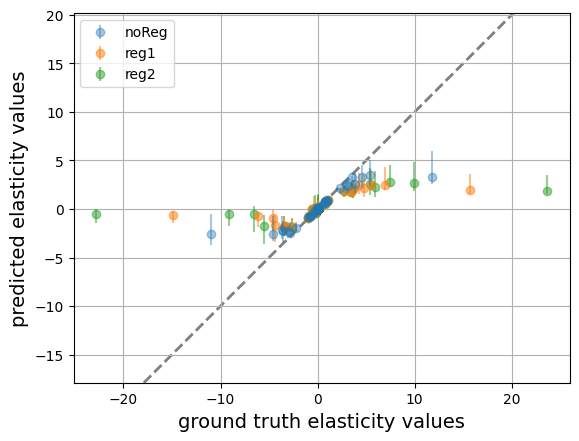

In [14]:
plt.axes().set_aspect('equal', 'datalim')

plt.errorbar(gt_noReg, ela_noReg_df['median'], yerr=errors_noReg, alpha=0.4, fmt='o', label='noReg', zorder=100)
plt.errorbar(gt_reg1, ela_reg1_df['median'], yerr=errors_reg1, alpha=0.5, fmt='o', label='reg1', zorder=50)
plt.errorbar(gt_reg2, ela_reg2_df['median'], yerr=errors_reg2, alpha=0.5, fmt='o', label='reg2', zorder=20)
# plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
plt.legend(loc="upper left")
plt.axline([0, 0], [1, 1], c='gray', linestyle='dashed', zorder=1, linewidth=2)
plt.grid(True, which='both', axis='both', zorder=0)
plt.xlabel('ground truth elasticity values', size=14)
plt.ylabel('predicted elasticity values', size=14)
plt.savefig(f'../data/results/raw_svg_figures/top{topology}/top{topology}-{omission}-combinedElasticities.svg', format="svg")

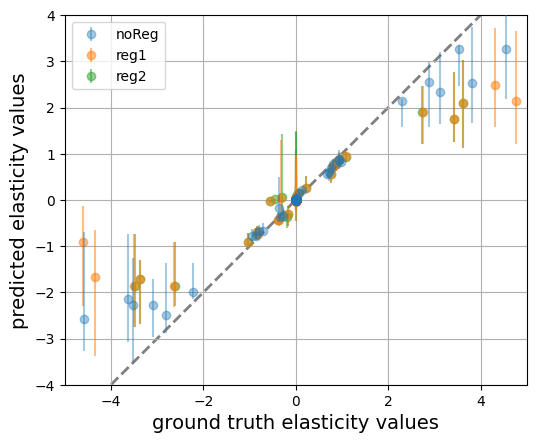

In [15]:
#plt.figure(figsize=(8, 6))
plt.axes().set_aspect('equal')
plt.xlim((-5,5))
plt.ylim((-4,4))


plt.errorbar(gt_noReg, ela_noReg_df['median'], yerr=errors_noReg, alpha=0.4, fmt='o', label='noReg', zorder=100)
plt.errorbar(gt_reg1, ela_reg1_df['median'], yerr=errors_reg1, alpha=0.5, fmt='o', label='reg1', zorder=50)
plt.errorbar(gt_reg2, ela_reg2_df['median'], yerr=errors_reg2, alpha=0.5, fmt='o', label='reg2', zorder=20)
# plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
plt.legend(loc="upper left")
plt.axline([0, 0], [1, 1], c='gray', linestyle='dashed', zorder=1, linewidth=2)
plt.grid(True, which='both', axis='both', zorder=0)
plt.xlabel('ground truth elasticity values', size=14)
plt.ylabel('predicted elasticity values', size=14)
plt.savefig(f'../data/results/raw_svg_figures/top{topology}/top{topology}-{omission}-combinedElasticities_zoom.svg', format="svg")

## Calculating FCC values and making graphs

In [16]:
gtFCC_noReg = pd.DataFrame(rr_noReg.getScaledFluxControlCoefficientMatrix(), index=rr_noReg.getReactionIds(), columns=rr_noReg.getReactionIds())
gtFCC_reg1 = pd.DataFrame(rr_reg1.getScaledFluxControlCoefficientMatrix(), index=rr_noReg.getReactionIds(), columns=rr_noReg.getReactionIds())
gtFCC_reg2 = pd.DataFrame(rr_reg2.getScaledFluxControlCoefficientMatrix(), index=rr_noReg.getReactionIds(), columns=rr_noReg.getReactionIds())

### priors

In [17]:
Ex01_prior_noReg= util.get_az_summary(util.run_prior_predictive(BMCA_obj01_noReg)['prior']['Ex'])
Ex02_prior_noReg= util.get_az_summary(util.run_prior_predictive(BMCA_obj02_noReg)['prior']['Ex'])
Ex03_prior_noReg= util.get_az_summary(util.run_prior_predictive(BMCA_obj03_noReg)['prior']['Ex'])
Ex04_prior_noReg= util.get_az_summary(util.run_prior_predictive(BMCA_obj04_noReg)['prior']['Ex'])
Ex05_prior_noReg= util.get_az_summary(util.run_prior_predictive(BMCA_obj05_noReg)['prior']['Ex'])
Ex15_prior_noReg= util.get_az_summary(util.run_prior_predictive(BMCA_obj15_noReg)['prior']['Ex'])
Ex3_prior_noReg= util.get_az_summary(util.run_prior_predictive(BMCA_obj3_noReg)['prior']['Ex'])
Ex5_prior_noReg= util.get_az_summary(util.run_prior_predictive(BMCA_obj5_noReg)['prior']['Ex'])
Ex7_prior_noReg= util.get_az_summary(util.run_prior_predictive(BMCA_obj7_noReg)['prior']['Ex'])
Ex100_prior_noReg= util.get_az_summary(util.run_prior_predictive(BMCA_obj100_noReg)['prior']['Ex'])

Ex01_prior_reg1= util.get_az_summary(util.run_prior_predictive(BMCA_obj01_reg1)['prior']['Ex'])
Ex02_prior_reg1= util.get_az_summary(util.run_prior_predictive(BMCA_obj02_reg1)['prior']['Ex'])
Ex03_prior_reg1= util.get_az_summary(util.run_prior_predictive(BMCA_obj03_reg1)['prior']['Ex'])
Ex04_prior_reg1= util.get_az_summary(util.run_prior_predictive(BMCA_obj04_reg1)['prior']['Ex'])
Ex05_prior_reg1= util.get_az_summary(util.run_prior_predictive(BMCA_obj05_reg1)['prior']['Ex'])
Ex15_prior_reg1= util.get_az_summary(util.run_prior_predictive(BMCA_obj15_reg1)['prior']['Ex'])
Ex3_prior_reg1= util.get_az_summary(util.run_prior_predictive(BMCA_obj3_reg1)['prior']['Ex'])
Ex5_prior_reg1= util.get_az_summary(util.run_prior_predictive(BMCA_obj5_reg1)['prior']['Ex'])
Ex7_prior_reg1= util.get_az_summary(util.run_prior_predictive(BMCA_obj7_reg1)['prior']['Ex'])
Ex100_prior_reg1= util.get_az_summary(util.run_prior_predictive(BMCA_obj100_reg1)['prior']['Ex'])

Ex01_prior_reg2= util.get_az_summary(util.run_prior_predictive(BMCA_obj01_reg2)['prior']['Ex'])
Ex02_prior_reg2= util.get_az_summary(util.run_prior_predictive(BMCA_obj02_reg2)['prior']['Ex'])
Ex03_prior_reg2= util.get_az_summary(util.run_prior_predictive(BMCA_obj03_reg2)['prior']['Ex'])
Ex04_prior_reg2= util.get_az_summary(util.run_prior_predictive(BMCA_obj04_reg2)['prior']['Ex'])
Ex05_prior_reg2= util.get_az_summary(util.run_prior_predictive(BMCA_obj05_reg2)['prior']['Ex'])
Ex15_prior_reg2= util.get_az_summary(util.run_prior_predictive(BMCA_obj15_reg2)['prior']['Ex'])
Ex3_prior_reg2= util.get_az_summary(util.run_prior_predictive(BMCA_obj3_reg2)['prior']['Ex'])
Ex5_prior_reg2= util.get_az_summary(util.run_prior_predictive(BMCA_obj5_reg2)['prior']['Ex'])
Ex7_prior_reg2= util.get_az_summary(util.run_prior_predictive(BMCA_obj7_reg2)['prior']['Ex'])
Ex100_prior_reg2= util.get_az_summary(util.run_prior_predictive(BMCA_obj100_reg2)['prior']['Ex'])


Sampling: [Ex_capacity_entries, Ex_kinetic_entries, Ey_capacity_entries, Ey_kinetic_entries]
arviz - WARNING - Shape validation failed: input_shape: (1, 500), minimum_shape: (chains=2, draws=4)
Sampling: [Ex_capacity_entries, Ex_kinetic_entries, Ey_capacity_entries, Ey_kinetic_entries]
arviz - WARNING - Shape validation failed: input_shape: (1, 500), minimum_shape: (chains=2, draws=4)
Sampling: [Ex_capacity_entries, Ex_kinetic_entries, Ey_capacity_entries, Ey_kinetic_entries]
arviz - WARNING - Shape validation failed: input_shape: (1, 500), minimum_shape: (chains=2, draws=4)
Sampling: [Ex_capacity_entries, Ex_kinetic_entries, Ey_capacity_entries, Ey_kinetic_entries]
arviz - WARNING - Shape validation failed: input_shape: (1, 500), minimum_shape: (chains=2, draws=4)
Sampling: [Ex_capacity_entries, Ex_kinetic_entries, Ey_capacity_entries, Ey_kinetic_entries]
arviz - WARNING - Shape validation failed: input_shape: (1, 500), minimum_shape: (chains=2, draws=4)
Sampling: [Ex_capacity_entries

In [18]:
priorFCC01_noReg = util.estimate_CCs(BMCA_obj01_noReg, Ex01_prior_noReg.reshape((19,13)))
priorFCC02_noReg = util.estimate_CCs(BMCA_obj02_noReg, Ex02_prior_noReg.reshape((19,13)))
priorFCC03_noReg = util.estimate_CCs(BMCA_obj03_noReg, Ex03_prior_noReg.reshape((19,13)))
priorFCC04_noReg = util.estimate_CCs(BMCA_obj04_noReg, Ex04_prior_noReg.reshape((19,13)))
priorFCC05_noReg = util.estimate_CCs(BMCA_obj05_noReg, Ex05_prior_noReg.reshape((19,13)))
priorFCC15_noReg = util.estimate_CCs(BMCA_obj15_noReg, Ex15_prior_noReg.reshape((19,13)))
priorFCC3_noReg = util.estimate_CCs(BMCA_obj3_noReg, Ex3_prior_noReg.reshape((19,13)))
priorFCC5_noReg = util.estimate_CCs(BMCA_obj5_noReg, Ex5_prior_noReg.reshape((19,13)))
priorFCC7_noReg = util.estimate_CCs(BMCA_obj7_noReg, Ex7_prior_noReg.reshape((19,13)))
priorFCC100_noReg = util.estimate_CCs(BMCA_obj100_noReg, Ex100_prior_noReg.reshape((19,13)))

priorFCC01_reg1 = util.estimate_CCs(BMCA_obj01_reg1, Ex01_prior_reg1.reshape((19,13)))
priorFCC02_reg1 = util.estimate_CCs(BMCA_obj02_reg1, Ex02_prior_reg1.reshape((19,13)))
priorFCC03_reg1 = util.estimate_CCs(BMCA_obj03_reg1, Ex03_prior_reg1.reshape((19,13)))
priorFCC04_reg1 = util.estimate_CCs(BMCA_obj04_reg1, Ex04_prior_reg1.reshape((19,13)))
priorFCC05_reg1 = util.estimate_CCs(BMCA_obj05_reg1, Ex05_prior_reg1.reshape((19,13)))
priorFCC15_reg1 = util.estimate_CCs(BMCA_obj15_reg1, Ex15_prior_reg1.reshape((19,13)))
priorFCC3_reg1 = util.estimate_CCs(BMCA_obj3_reg1, Ex3_prior_reg1.reshape((19,13)))
priorFCC5_reg1 = util.estimate_CCs(BMCA_obj5_reg1, Ex5_prior_reg1.reshape((19,13)))
priorFCC7_reg1 = util.estimate_CCs(BMCA_obj7_reg1, Ex7_prior_reg1.reshape((19,13)))
priorFCC100_reg1 = util.estimate_CCs(BMCA_obj100_reg1, Ex100_prior_reg1.reshape((19,13)))

priorFCC01_reg2 = util.estimate_CCs(BMCA_obj01_reg2, Ex01_prior_reg2.reshape((19,13)))
priorFCC02_reg2 = util.estimate_CCs(BMCA_obj02_reg2, Ex02_prior_reg2.reshape((19,13)))
priorFCC03_reg2 = util.estimate_CCs(BMCA_obj03_reg2, Ex03_prior_reg2.reshape((19,13)))
priorFCC04_reg2 = util.estimate_CCs(BMCA_obj04_reg2, Ex04_prior_reg2.reshape((19,13)))
priorFCC05_reg2 = util.estimate_CCs(BMCA_obj05_reg2, Ex05_prior_reg2.reshape((19,13)))
priorFCC15_reg2 = util.estimate_CCs(BMCA_obj15_reg2, Ex15_prior_reg2.reshape((19,13)))
priorFCC3_reg2 = util.estimate_CCs(BMCA_obj3_reg2, Ex3_prior_reg2.reshape((19,13)))
priorFCC5_reg2 = util.estimate_CCs(BMCA_obj5_reg2, Ex5_prior_reg2.reshape((19,13)))
priorFCC7_reg2 = util.estimate_CCs(BMCA_obj7_reg2, Ex7_prior_reg2.reshape((19,13)))
priorFCC100_reg2 = util.estimate_CCs(BMCA_obj100_reg2, Ex100_prior_reg2.reshape((19,13)))


In [19]:
priorFCCs_noReg = [priorFCC01_noReg, priorFCC02_noReg, priorFCC03_noReg, priorFCC04_noReg, priorFCC05_noReg, priorFCC15_noReg, priorFCC3_noReg, priorFCC5_noReg, priorFCC7_noReg, priorFCC100_noReg]
priorFCCs_reg1 = [priorFCC01_reg1, priorFCC02_reg1, priorFCC03_reg1, priorFCC04_reg1, priorFCC05_reg1, priorFCC15_reg1, priorFCC3_reg1, priorFCC5_reg1, priorFCC7_reg1, priorFCC100_reg1]
priorFCCs_reg2 = [priorFCC01_reg2, priorFCC02_reg2, priorFCC03_reg2, priorFCC04_reg2, priorFCC05_reg2, priorFCC15_reg2, priorFCC3_reg2, priorFCC5_reg2, priorFCC7_reg2, priorFCC100_reg2]

In [20]:
priorFCC_noReg_meds = [-pd.DataFrame(np.median(priorFCC, axis=0), columns=rr_noReg.getReactionIds(), index=rr_noReg.getReactionIds()) for priorFCC in priorFCCs_noReg]
priorFCC_noReg_meds = pd.concat([i.melt()['value'] for i in priorFCC_noReg_meds], axis=1).values
priorFCC_noReg_meds = pd.DataFrame(priorFCC_noReg_meds, columns=pt_labels)
priorFCC_noReg_meds['median'] = priorFCC_noReg_meds.median(axis=1)
priorFCC_noReg_meds['min'] = priorFCC_noReg_meds.min(axis=1)
priorFCC_noReg_meds['max'] = priorFCC_noReg_meds.max(axis=1)
# priorFCC_noReg_meds

In [21]:
priorFCC_reg1_meds = [-pd.DataFrame(np.median(priorFCC, axis=0), columns=rr_reg1.getReactionIds(), index=rr_reg1.getReactionIds()) for priorFCC in priorFCCs_reg1]
priorFCC_reg1_meds = pd.concat([i.melt()['value'] for i in priorFCC_reg1_meds], axis=1).values
priorFCC_reg1_meds = pd.DataFrame(priorFCC_reg1_meds, columns=pt_labels)
priorFCC_reg1_meds['median'] = priorFCC_reg1_meds.median(axis=1)
priorFCC_reg1_meds['min'] = priorFCC_reg1_meds.min(axis=1)
priorFCC_reg1_meds['max'] = priorFCC_reg1_meds.max(axis=1)
# priorFCC_reg1_meds

In [22]:
priorFCC_reg2_meds = [-pd.DataFrame(np.median(priorFCC, axis=0), columns=rr_reg2.getReactionIds(), index=rr_reg2.getReactionIds()) for priorFCC in priorFCCs_reg2]
priorFCC_reg2_meds = pd.concat([i.melt()['value'] for i in priorFCC_reg2_meds], axis=1).values
priorFCC_reg2_meds = pd.DataFrame(priorFCC_reg2_meds, columns=pt_labels)
priorFCC_reg2_meds['median'] = priorFCC_reg2_meds.median(axis=1)
priorFCC_reg2_meds['min'] = priorFCC_reg2_meds.min(axis=1)
priorFCC_reg2_meds['max'] = priorFCC_reg2_meds.max(axis=1)
# priorFCC_reg2_meds

In [23]:
FCC_lower_y_noReg_prior = np.array(priorFCC_noReg_meds['median']) - np.array(priorFCC_noReg_meds['min'])
FCC_upper_y_noReg_prior = np.array(priorFCC_noReg_meds['max']) - np.array(priorFCC_noReg_meds['median'])
FCC_errors_noReg_prior = [FCC_lower_y_noReg_prior, FCC_upper_y_noReg_prior]

FCC_lower_y_reg1_prior = np.array(priorFCC_reg1_meds['median']) - np.array(priorFCC_reg1_meds['min'])
FCC_upper_y_reg1_prior = np.array(priorFCC_reg1_meds['max']) - np.array(priorFCC_reg1_meds['median'])
FCC_errors_reg1_prior = [FCC_lower_y_reg1_prior, FCC_upper_y_reg1_prior]

FCC_lower_y_reg2_prior = np.array(priorFCC_reg2_meds['median']) - np.array(priorFCC_reg2_meds['min'])
FCC_upper_y_reg2_prior = np.array(priorFCC_reg2_meds['max']) - np.array(priorFCC_reg2_meds['median'])
FCC_errors_reg2_prior = [FCC_lower_y_reg2_prior, FCC_upper_y_reg2_prior]

### posteriors

In [24]:
# all data
postFCC01_noReg = util.estimate_CCs(BMCA_obj01_noReg, Ex01_noReg.reshape((19,13)))
postFCC02_noReg = util.estimate_CCs(BMCA_obj02_noReg, Ex02_noReg.reshape((19,13)))
postFCC03_noReg = util.estimate_CCs(BMCA_obj03_noReg, Ex03_noReg.reshape((19,13)))
postFCC04_noReg = util.estimate_CCs(BMCA_obj04_noReg, Ex04_noReg.reshape((19,13)))
postFCC05_noReg = util.estimate_CCs(BMCA_obj05_noReg, Ex05_noReg.reshape((19,13)))
postFCC15_noReg = util.estimate_CCs(BMCA_obj15_noReg, Ex15_noReg.reshape((19,13)))
postFCC3_noReg = util.estimate_CCs(BMCA_obj3_noReg, Ex3_noReg.reshape((19,13)))
postFCC5_noReg = util.estimate_CCs(BMCA_obj5_noReg, Ex5_noReg.reshape((19,13)))
postFCC7_noReg = util.estimate_CCs(BMCA_obj7_noReg, Ex7_noReg.reshape((19,13)))
postFCC100_noReg = util.estimate_CCs(BMCA_obj100_noReg, Ex100_noReg.reshape((19,13)))

postFCC01_reg1 = util.estimate_CCs(BMCA_obj01_reg1, Ex01_reg1.reshape((19,13)))
postFCC02_reg1 = util.estimate_CCs(BMCA_obj02_reg1, Ex02_reg1.reshape((19,13)))
postFCC03_reg1 = util.estimate_CCs(BMCA_obj03_reg1, Ex03_reg1.reshape((19,13)))
postFCC04_reg1 = util.estimate_CCs(BMCA_obj04_reg1, Ex04_reg1.reshape((19,13)))
postFCC05_reg1 = util.estimate_CCs(BMCA_obj05_reg1, Ex05_reg1.reshape((19,13)))
postFCC15_reg1 = util.estimate_CCs(BMCA_obj15_reg1, Ex15_reg1.reshape((19,13)))
postFCC3_reg1 = util.estimate_CCs(BMCA_obj3_reg1, Ex3_reg1.reshape((19,13)))
postFCC5_reg1 = util.estimate_CCs(BMCA_obj5_reg1, Ex5_reg1.reshape((19,13)))
postFCC7_reg1 = util.estimate_CCs(BMCA_obj7_reg1, Ex7_reg1.reshape((19,13)))
postFCC100_reg1 = util.estimate_CCs(BMCA_obj100_reg1, Ex100_reg1.reshape((19,13)))

postFCC01_reg2 = util.estimate_CCs(BMCA_obj01_reg2, Ex01_reg2.reshape((19,13)))
postFCC02_reg2 = util.estimate_CCs(BMCA_obj02_reg2, Ex02_reg2.reshape((19,13)))
postFCC03_reg2 = util.estimate_CCs(BMCA_obj03_reg2, Ex03_reg2.reshape((19,13)))
postFCC04_reg2 = util.estimate_CCs(BMCA_obj04_reg2, Ex04_reg2.reshape((19,13)))
postFCC05_reg2 = util.estimate_CCs(BMCA_obj05_reg2, Ex05_reg2.reshape((19,13)))
postFCC15_reg2 = util.estimate_CCs(BMCA_obj15_reg2, Ex15_reg2.reshape((19,13)))
postFCC3_reg2 = util.estimate_CCs(BMCA_obj3_reg2, Ex3_reg2.reshape((19,13)))
postFCC5_reg2 = util.estimate_CCs(BMCA_obj5_reg2, Ex5_reg2.reshape((19,13)))
postFCC7_reg2 = util.estimate_CCs(BMCA_obj7_reg2, Ex7_reg2.reshape((19,13)))
postFCC100_reg2 = util.estimate_CCs(BMCA_obj100_reg2, Ex100_reg2.reshape((19,13)))

In [25]:
postFCCs_noReg = [postFCC01_noReg, postFCC02_noReg, postFCC03_noReg, postFCC04_noReg, postFCC05_noReg, postFCC15_noReg, postFCC3_noReg, postFCC5_noReg, postFCC7_noReg, postFCC100_noReg]
postFCCs_reg1 = [postFCC01_reg1, postFCC02_reg1, postFCC03_reg1, postFCC04_reg1, postFCC05_reg1, postFCC15_reg1, postFCC3_reg1, postFCC5_reg1, postFCC7_reg1, postFCC100_reg1]
postFCCs_reg2 = [postFCC01_reg2, postFCC02_reg2, postFCC03_reg2, postFCC04_reg2, postFCC05_reg2, postFCC15_reg2, postFCC3_reg2, postFCC5_reg2, postFCC7_reg2, postFCC100_reg2]

In [26]:
postFCC_noReg_meds = [-pd.DataFrame(np.median(postFCC, axis=0), columns=rr_noReg.getReactionIds(), index=rr_noReg.getReactionIds()) for postFCC in postFCCs_noReg]
postFCC_noReg_meds = pd.concat([i.melt()['value'] for i in postFCC_noReg_meds], axis=1).values
postFCC_noReg_meds = pd.DataFrame(postFCC_noReg_meds, columns=pt_labels)
postFCC_noReg_meds['median'] = postFCC_noReg_meds.median(axis=1)
postFCC_noReg_meds['min'] = postFCC_noReg_meds.min(axis=1)
postFCC_noReg_meds['max'] = postFCC_noReg_meds.max(axis=1)
# postFCC_noReg_meds

In [27]:
postFCC_reg1_meds = [-pd.DataFrame(np.median(postFCC, axis=0), columns=rr_reg1.getReactionIds(), index=rr_reg1.getReactionIds()) for postFCC in postFCCs_reg1]
postFCC_reg1_meds = pd.concat([i.melt()['value'] for i in postFCC_reg1_meds], axis=1).values
postFCC_reg1_meds = pd.DataFrame(postFCC_reg1_meds, columns=pt_labels)
postFCC_reg1_meds['median'] = postFCC_reg1_meds.median(axis=1)
postFCC_reg1_meds['min'] = postFCC_reg1_meds.min(axis=1)
postFCC_reg1_meds['max'] = postFCC_reg1_meds.max(axis=1)
# postFCC_reg1_meds

In [28]:
postFCC_reg2_meds = [-pd.DataFrame(np.median(postFCC, axis=0), columns=rr_reg2.getReactionIds(), index=rr_reg2.getReactionIds()) for postFCC in postFCCs_reg2]
postFCC_reg2_meds = pd.concat([i.melt()['value'] for i in postFCC_reg2_meds], axis=1).values
postFCC_reg2_meds = pd.DataFrame(postFCC_reg2_meds, columns=pt_labels)
postFCC_reg2_meds['median'] = postFCC_reg2_meds.median(axis=1)
postFCC_reg2_meds['min'] = postFCC_reg2_meds.min(axis=1)
postFCC_reg2_meds['max'] = postFCC_reg2_meds.max(axis=1)
# postFCC_reg2_meds

In [29]:
FCC_lower_y_noReg_post = np.array(postFCC_noReg_meds['median']) - np.array(postFCC_noReg_meds['min'])
FCC_upper_y_noReg_post = np.array(postFCC_noReg_meds['max']) - np.array(postFCC_noReg_meds['median'])
FCC_errors_noReg_post = [FCC_lower_y_noReg_post, FCC_upper_y_noReg_post]

FCC_lower_y_reg1_post = np.array(postFCC_reg1_meds['median']) - np.array(postFCC_reg1_meds['min'])
FCC_upper_y_reg1_post = np.array(postFCC_reg1_meds['max']) - np.array(postFCC_reg1_meds['median'])
FCC_errors_reg1_post = [FCC_lower_y_reg1_post, FCC_upper_y_reg1_post]

FCC_lower_y_reg2_post = np.array(postFCC_reg2_meds['median']) - np.array(postFCC_reg2_meds['min'])
FCC_upper_y_reg2_post = np.array(postFCC_reg2_meds['max']) - np.array(postFCC_reg2_meds['median'])
FCC_errors_reg2_post = [FCC_lower_y_reg2_post, FCC_upper_y_reg2_post]

### graphs

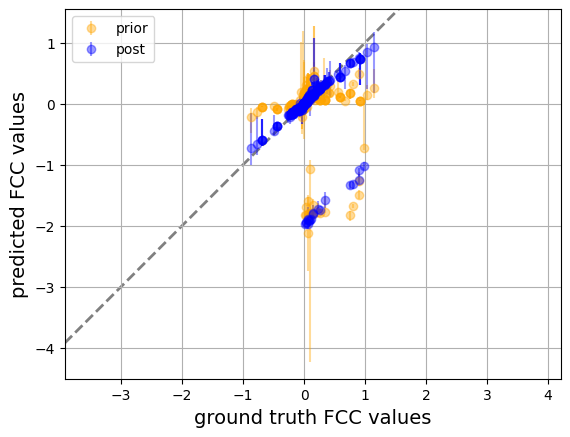

In [40]:
plt.axes().set_aspect('equal', 'datalim')

plt.errorbar(gtFCC_noReg.melt()['value'], priorFCC_noReg_meds['median'], yerr=FCC_errors_noReg_prior, alpha=0.4, fmt='o', label='prior', zorder=100, c='orange')
plt.errorbar(gtFCC_noReg.melt()['value'], postFCC_noReg_meds['median'], yerr=FCC_errors_noReg_post, alpha=0.4, fmt='o', label='post', zorder=100, c='b')

plt.legend(loc="upper left")
plt.axline([0, 0], [1, 1], c='gray', linestyle='dashed', zorder=1, linewidth=2)
plt.grid(True, which='both', axis='both', zorder=0)
plt.xlabel('ground truth FCC values', size=14)
plt.ylabel('predicted FCC values', size=14)
plt.savefig(f'../data/results/raw_svg_figures/top{topology}-{omission}-medianFCCs_noReg.svg', format="svg")

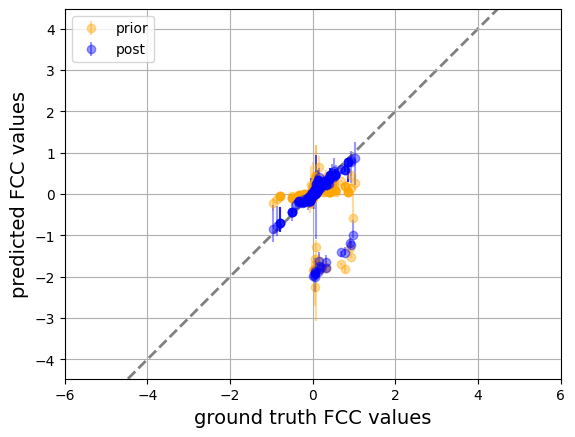

In [41]:
plt.axes().set_aspect('equal', 'datalim')

plt.errorbar(gtFCC_reg1.melt()['value'], priorFCC_reg1_meds['median'], yerr=FCC_errors_reg1_prior, alpha=0.4, fmt='o', label='prior', zorder=100, c='orange')
plt.errorbar(gtFCC_reg1.melt()['value'], postFCC_reg1_meds['median'], yerr=FCC_errors_reg1_post, alpha=0.4, fmt='o', label='post', zorder=100, c='b')
plt.xlim((-6,6))
plt.ylim((-6,6))
plt.legend(loc="upper left")
plt.axline([0, 0], [1, 1], c='gray', linestyle='dashed', zorder=1, linewidth=2)
plt.grid(True, which='both', axis='both', zorder=0)
plt.xlabel('ground truth FCC values', size=14)
plt.ylabel('predicted FCC values', size=14)

plt.savefig(f'../data/results/raw_svg_figures/top{topology}-{omission}-medianFCCs_reg1.svg', format="svg")

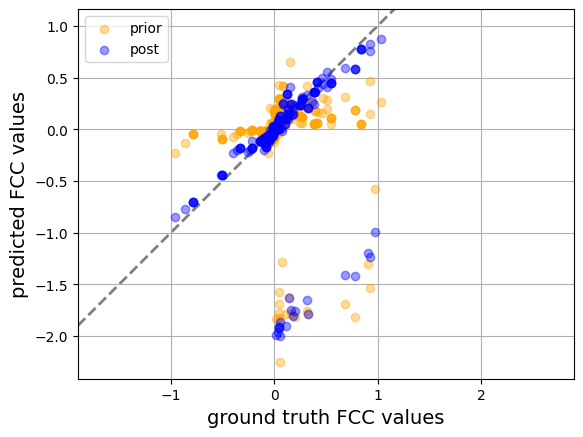

In [43]:
## needs to be rerun

plt.axes().set_aspect('equal', 'datalim')

plt.scatter(gtFCC_reg1.melt()['value'], priorFCC_reg1_meds['median'], alpha=0.4, label='prior', zorder=100, c='orange')
plt.scatter(gtFCC_reg1.melt()['value'], postFCC_reg1_meds['median'], alpha=0.4,  label='post', zorder=100, c='b')
plt.xlim((-6,7))
plt.legend(loc="upper left")
plt.axline([0, 0], [1, 1], c='gray', linestyle='dashed', zorder=1, linewidth=2)
plt.grid(True, which='both', axis='both', zorder=0)
plt.xlabel('ground truth FCC values', size=14)
plt.ylabel('predicted FCC values', size=14)

plt.savefig(f'../data/results/raw_svg_figures/top{topology}-{omission}-medianFCCs_reg1.svg', format="svg")

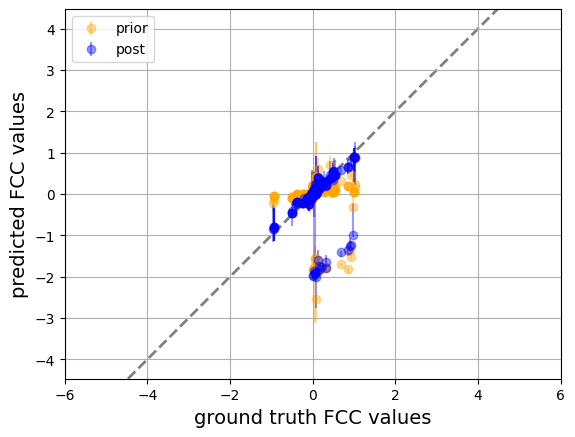

In [45]:
plt.axes().set_aspect('equal', 'datalim')

plt.errorbar(gtFCC_reg2.melt()['value'], priorFCC_reg2_meds['median'], yerr=FCC_errors_reg2_prior, alpha=0.4, fmt='o', label='prior', zorder=100, c='orange')
plt.errorbar(gtFCC_reg2.melt()['value'], postFCC_reg2_meds['median'], yerr=FCC_errors_reg2_post, alpha=0.4, fmt='o', label='post', zorder=100, c='b')
plt.xlim((-6,6))
plt.ylim((-6,6))
plt.legend(loc="upper left")
plt.axline([0, 0], [1, 1], c='gray', linestyle='dashed', zorder=1, linewidth=2)
plt.grid(True, which='both', axis='both', zorder=0)
plt.xlabel('ground truth FCC values', size=14)
plt.ylabel('predicted FCC values', size=14)
plt.savefig(f'../data/results/raw_svg_figures/top{topology}-{omission}-medianFCCs_reg2.svg', format="svg")

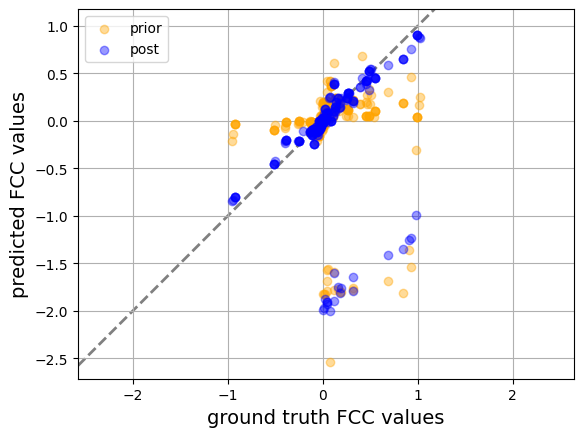

In [48]:
plt.axes().set_aspect('equal', 'datalim')

plt.scatter(gtFCC_reg2.melt()['value'], priorFCC_reg2_meds['median'], alpha=0.4, label='prior', zorder=100, c='orange')
plt.scatter(gtFCC_reg2.melt()['value'], postFCC_reg2_meds['median'], alpha=0.4, label='post', zorder=100, c='b')

plt.legend(loc="upper left")
plt.axline([0, 0], [1, 1], c='gray', linestyle='dashed', zorder=1, linewidth=2)
plt.grid(True, which='both', axis='both', zorder=0)
plt.xlabel('ground truth FCC values', size=14)
plt.ylabel('predicted FCC values', size=14)
plt.savefig(f'../data/results/raw_svg_figures/top{topology}-{omission}-medianFCCs_reg2.svg', format="svg")

### adding corrections for where the enzyme perturbed is directly involved in the reaction

In [30]:
rxn = np.repeat(rr_noReg.getReactionIds(),len(rr_noReg.getReactionIds()))
enz_pt = rr_noReg.getReactionIds() * len(rr_noReg.getReactionIds())
FCC_idx = pd.DataFrame([rxn, enz_pt]).T

In [31]:
for i in np.where(abs(gtFCC_noReg.melt()['value']- postFCC_noReg_meds['median'])>1):
    print(FCC_idx.iloc[i])
pt_enz_is_rxn = list(np.where(abs(gtFCC_noReg.melt()['value']- postFCC_noReg_meds['median'])>1)[0])

       0    1
0     v1   v1
20    v2   v2
40    v3   v3
60    v4   v4
80    v5   v5
100   v6   v6
120   v7   v7
140   v8   v8
160   v9   v9
180  v10  v10
200  v11  v11
220  v12  v12
240  v13  v13
260  v14  v14
280  v15  v15
300  v16  v16
320  v17  v17
340  v18  v18
360  v19  v19


### graphing the corrected FCC dfs

In [51]:
priorFCC_noReg_meds.loc[pt_enz_is_rxn, 'median'] += 2
postFCC_noReg_meds.loc[pt_enz_is_rxn, 'median'] += 2

priorFCC_reg1_meds.loc[pt_enz_is_rxn, 'median'] += 2
postFCC_reg1_meds.loc[pt_enz_is_rxn, 'median'] += 2

priorFCC_reg2_meds.loc[pt_enz_is_rxn, 'median'] += 2
postFCC_reg2_meds.loc[pt_enz_is_rxn, 'median'] += 2

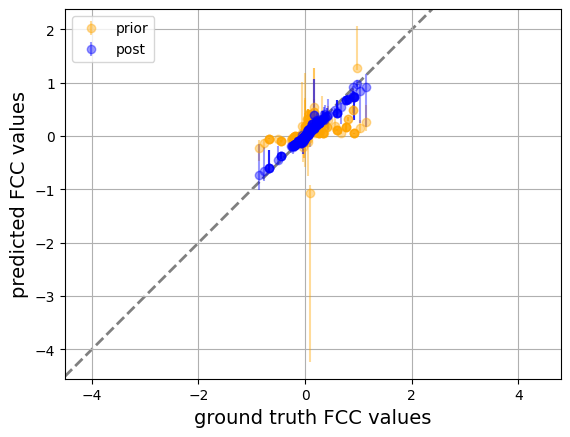

In [53]:
plt.axes().set_aspect('equal', 'datalim')

plt.errorbar(gtFCC_noReg.melt()['value'], priorFCC_noReg_meds['median'], yerr=FCC_errors_noReg_prior, alpha=0.4, fmt='o', label='prior', zorder=100, c='orange')
plt.errorbar(gtFCC_noReg.melt()['value'], postFCC_noReg_meds['median'], yerr=FCC_errors_noReg_post, alpha=0.4, fmt='o', label='post', zorder=100, c='b')

plt.legend(loc="upper left")
plt.axline([0, 0], [1, 1], c='gray', linestyle='dashed', zorder=1, linewidth=2)
plt.grid(True, which='both', axis='both', zorder=0)
plt.xlabel('ground truth FCC values', size=14)
plt.ylabel('predicted FCC values', size=14)
plt.savefig(f'../data/results/raw_svg_figures/top{topology}-{omission}-medianFCCs_noReg_wCorrection.svg', format="svg")

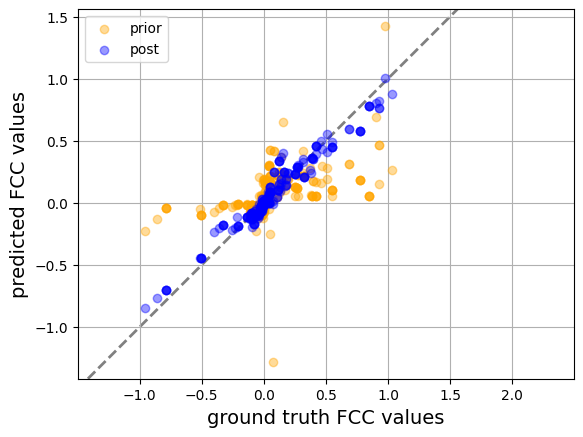

In [55]:
plt.axes().set_aspect('equal', 'datalim')

plt.scatter(gtFCC_reg1.melt()['value'], priorFCC_reg1_meds['median'], alpha=0.4, label='prior', zorder=100, c='orange')
plt.scatter(gtFCC_reg1.melt()['value'], postFCC_reg1_meds['median'], alpha=0.4,  label='post', zorder=100, c='b')
plt.xlim((-6,7))

plt.legend(loc="upper left")
plt.axline([0, 0], [1, 1], c='gray', linestyle='dashed', zorder=1, linewidth=2)
plt.grid(True, which='both', axis='both', zorder=0)
plt.xlabel('ground truth FCC values', size=14)
plt.ylabel('predicted FCC values', size=14)
plt.savefig(f'../data/results/raw_svg_figures/top{topology}-{omission}-medianFCCs_reg1_wCorrection.svg', format="svg")

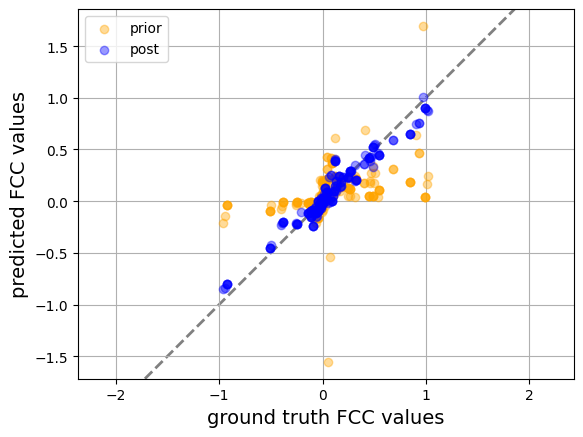

In [57]:
plt.axes().set_aspect('equal', 'datalim')

plt.scatter(gtFCC_reg2.melt()['value'], priorFCC_reg2_meds['median'], alpha=0.4, label='prior', zorder=100, c='orange')
plt.scatter(gtFCC_reg2.melt()['value'], postFCC_reg2_meds['median'], alpha=0.4, label='post', zorder=100, c='b')

plt.legend(loc="upper left")
plt.axline([0, 0], [1, 1], c='gray', linestyle='dashed', zorder=1, linewidth=2)
plt.grid(True, which='both', axis='both', zorder=0)
plt.xlabel('ground truth FCC values', size=14)
plt.ylabel('predicted FCC values', size=14)
plt.savefig(f'../data/results/raw_svg_figures/top{topology}-{omission}-medianFCCs_reg2_wCorrection.svg', format="svg")

### Combined graph of FCC values

In [ ]:
# Create two subplots and unpack the output array immediately
f, ax = plt.subplots(2, 3, figsize=(16,8))

for i in range(2):
    for ii in range(3):
        ax[i,ii].tick_params(axis='both', which='major', labelsize=16)

ax[0,0].set_aspect('equal', 'datalim')
ax[0,0].scatter(gtFCC_noReg.melt()['value'], priorFCC_noReg_meds['median'], alpha=0.4, label='prior', zorder=100, c='orange')
ax[0,0].scatter(gtFCC_noReg.melt()['value'], postFCC_noReg_meds['median'], alpha=0.4, label='post', zorder=100, c='b')
slope, intercept, _ = util.calculate_slope(gtFCC_noReg.melt()['value'], priorFCC_noReg_meds['median'])
ax[0,0].axline((0, intercept), slope=slope, linestyle='--', alpha=0.6, color='orange', zorder=0)
slope, intercept, _ = util.calculate_slope(gtFCC_noReg.melt()['value'], postFCC_noReg_meds['median'])
ax[0,0].axline((0, intercept), slope=slope, linestyle='--', alpha=0.6, color='b', zorder=0)
ax[0,0].axline([0, 0], [1, 1], c='gray', linestyle='dashed', zorder=1, linewidth=3)
ax[0,0].grid()
ax[0,0].legend(loc="lower right", fontsize=16)

ax[0,1].set_aspect('equal', 'datalim')
ax[0,1].scatter(gtFCC_reg1.melt()['value'], priorFCC_reg1_meds['median'], alpha=0.4, label='prior', zorder=100, c='orange')
ax[0,1].scatter(gtFCC_reg1.melt()['value'], postFCC_reg1_meds['median'], alpha=0.4,  label='post', zorder=100, c='b')
slope, intercept, _ = util.calculate_slope(gtFCC_reg1.melt()['value'], priorFCC_reg1_meds['median'])
ax[0,1].axline((0, intercept), slope=slope, linestyle='--', alpha=0.6, color='orange', zorder=0)
slope, intercept, _ = util.calculate_slope(gtFCC_reg1.melt()['value'], postFCC_reg1_meds['median'])
ax[0,1].axline((0, intercept), slope=slope, linestyle='--', alpha=0.6, color='b', zorder=0)
ax[0,1].axline([0, 0], [1, 1], c='gray', linestyle='dashed', zorder=1, linewidth=3)
ax[0,1].grid()

ax[0,2].set_aspect('equal', 'datalim')
ax[0,2].scatter(gtFCC_reg2.melt()['value'], priorFCC_reg2_meds['median'], alpha=0.4, label='prior', zorder=100, c='orange')
ax[0,2].scatter(gtFCC_reg2.melt()['value'], postFCC_reg2_meds['median'], alpha=0.4,  label='post', zorder=100, c='b')
slope, intercept, _ = util.calculate_slope(gtFCC_reg2.melt()['value'], priorFCC_reg2_meds['median'])
ax[0,2].axline((0, intercept), slope=slope, linestyle='--', alpha=0.6, color='orange', zorder=0)
slope, intercept, _ = util.calculate_slope(gtFCC_reg2.melt()['value'], postFCC_reg2_meds['median'])
ax[0,2].axline((0, intercept), slope=slope, linestyle='--', alpha=0.6, color='b', zorder=0)
ax[0,2].axline([0, 0], [1, 1], c='gray', linestyle='dashed', zorder=1, linewidth=3)
ax[0,2].grid()

priorFCC_noReg_meds.loc[pt_enz_is_rxn, 'median'] += 2
postFCC_noReg_meds.loc[pt_enz_is_rxn, 'median'] += 2

priorFCC_reg1_meds.loc[pt_enz_is_rxn, 'median'] += 2
postFCC_reg1_meds.loc[pt_enz_is_rxn, 'median'] += 2

priorFCC_reg2_meds.loc[pt_enz_is_rxn, 'median'] += 2
postFCC_reg2_meds.loc[pt_enz_is_rxn, 'median'] += 2

ax[1,0].set_aspect('equal', 'datalim')
ax[1,0].scatter(gtFCC_noReg.melt()['value'], priorFCC_noReg_meds['median'], alpha=0.4, label='prior', zorder=100, c='orange')
ax[1,0].scatter(gtFCC_noReg.melt()['value'], postFCC_noReg_meds['median'], alpha=0.4, label='post', zorder=100, c='b')
slope, intercept, _ = util.calculate_slope(gtFCC_noReg.melt()['value'], priorFCC_noReg_meds['median'])
ax[1,0].axline((0, intercept), slope=slope, linestyle='--', alpha=0.6, color='orange', zorder=0)
slope, intercept, _ = util.calculate_slope(gtFCC_noReg.melt()['value'], postFCC_noReg_meds['median'])
ax[1,0].axline((0, intercept), slope=slope, linestyle='--', alpha=0.6, color='b', zorder=0)
ax[1,0].axline([0, 0], [1, 1], c='gray', linestyle='dashed', zorder=1, linewidth=3)
ax[1,0].grid()

ax[1,1].set_aspect('equal', 'datalim')
ax[1,1].scatter(gtFCC_reg1.melt()['value'], priorFCC_reg1_meds['median'], alpha=0.4, label='prior', zorder=100, c='orange')
ax[1,1].scatter(gtFCC_reg1.melt()['value'], postFCC_reg1_meds['median'], alpha=0.4,  label='post', zorder=100, c='b')
slope, intercept, _ = util.calculate_slope(gtFCC_reg1.melt()['value'], priorFCC_reg1_meds['median'])
ax[1,1].axline((0, intercept), slope=slope, linestyle='--', alpha=0.6, color='orange', zorder=0)
slope, intercept, _ = util.calculate_slope(gtFCC_reg1.melt()['value'], postFCC_reg1_meds['median'])
ax[1,1].axline((0, intercept), slope=slope, linestyle='--', alpha=0.6, color='b', zorder=0)
ax[1,1].axline([0, 0], [1, 1], c='gray', linestyle='dashed', zorder=1, linewidth=3)
ax[1,1].grid()

ax[1,2].set_aspect('equal', 'datalim')
ax[1,2].scatter(gtFCC_reg2.melt()['value'], priorFCC_reg2_meds['median'], alpha=0.4, label='prior', zorder=100, c='orange')
ax[1,2].scatter(gtFCC_reg2.melt()['value'], postFCC_reg2_meds['median'], alpha=0.4,  label='post', zorder=100, c='b')
slope, intercept, _ = util.calculate_slope(gtFCC_reg2.melt()['value'], priorFCC_reg2_meds['median'])
ax[1,2].axline((0, intercept), slope=slope, linestyle='--', alpha=0.6, color='orange', zorder=0)
slope, intercept, _ = util.calculate_slope(gtFCC_reg2.melt()['value'], postFCC_reg2_meds['median'])
ax[1,2].axline((0, intercept), slope=slope, linestyle='--', alpha=0.6, color='b', zorder=0)
ax[1,2].axline([0, 0], [1, 1], c='gray', linestyle='dashed', zorder=1, linewidth=3)
ax[1,2].grid()
    
f.tight_layout()

plt.savefig(f'../data/results/raw_svg_figures/top{topology}-{omission}-combinedFCCs.svg', format="svg")

In [32]:
priorFCC_noReg_meds.loc[pt_enz_is_rxn, 'median'] += 2
postFCC_noReg_meds.loc[pt_enz_is_rxn, 'median'] += 2

priorFCC_reg1_meds.loc[pt_enz_is_rxn, 'median'] += 2
postFCC_reg1_meds.loc[pt_enz_is_rxn, 'median'] += 2

priorFCC_reg2_meds.loc[pt_enz_is_rxn, 'median'] += 2
postFCC_reg2_meds.loc[pt_enz_is_rxn, 'median'] += 2

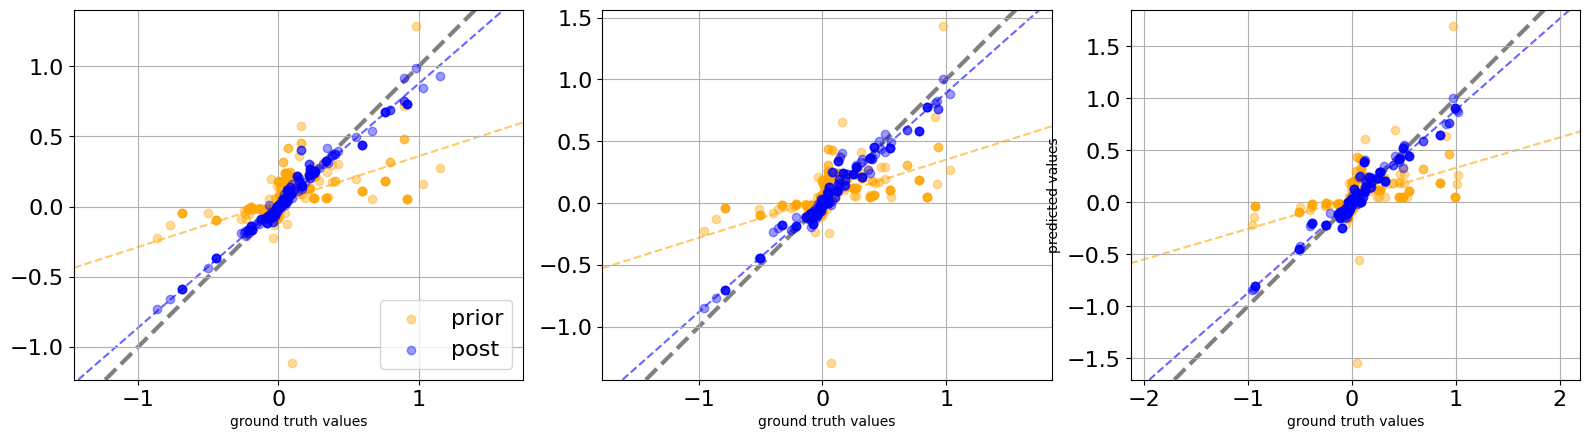

In [33]:
# Create two subplots and unpack the output array immediately
f, ax = plt.subplots(1, 3, figsize=(16,4.5))

for ii in range(3):
    ax[ii].tick_params(axis='both', which='major', labelsize=16)

ax[0].set_aspect('equal', 'datalim')
ax[0].scatter(gtFCC_noReg.melt()['value'], priorFCC_noReg_meds['median'], alpha=0.4, label='prior', zorder=100, c='orange')
ax[0].scatter(gtFCC_noReg.melt()['value'], postFCC_noReg_meds['median'], alpha=0.4, label='post', zorder=100, c='b')
slope, intercept, _ = util.calculate_slope(gtFCC_noReg.melt()['value'], priorFCC_noReg_meds['median'])
ax[0].axline((0, intercept), slope=slope, linestyle='--', alpha=0.6, color='orange', zorder=0)
slope, intercept, _ = util.calculate_slope(gtFCC_noReg.melt()['value'], postFCC_noReg_meds['median'])
ax[0].axline((0, intercept), slope=slope, linestyle='--', alpha=0.6, color='b', zorder=0)
ax[0].axline([0, 0], [1, 1], c='gray', linestyle='dashed', zorder=1, linewidth=3)
ax[0].grid()
ax[0].legend(loc="lower right", fontsize=16)
ax[0].set_xlabel('ground truth values')

ax[1].set_aspect('equal', 'datalim')
ax[1].scatter(gtFCC_reg1.melt()['value'], priorFCC_reg1_meds['median'], alpha=0.4, label='prior', zorder=100, c='orange')
ax[1].scatter(gtFCC_reg1.melt()['value'], postFCC_reg1_meds['median'], alpha=0.4,  label='post', zorder=100, c='b')
slope, intercept, _ = util.calculate_slope(gtFCC_reg1.melt()['value'], priorFCC_reg1_meds['median'])
ax[1].axline((0, intercept), slope=slope, linestyle='--', alpha=0.6, color='orange', zorder=0)
slope, intercept, _ = util.calculate_slope(gtFCC_reg1.melt()['value'], postFCC_reg1_meds['median'])
ax[1].axline((0, intercept), slope=slope, linestyle='--', alpha=0.6, color='b', zorder=0)
ax[1].axline([0, 0], [1, 1], c='gray', linestyle='dashed', zorder=1, linewidth=3)
ax[1].grid()
ax[1].set_xlabel('ground truth values')

ax[2].set_aspect('equal', 'datalim')
ax[2].scatter(gtFCC_reg2.melt()['value'], priorFCC_reg2_meds['median'], alpha=0.4, label='prior', zorder=100, c='orange')
ax[2].scatter(gtFCC_reg2.melt()['value'], postFCC_reg2_meds['median'], alpha=0.4,  label='post', zorder=100, c='b')
slope, intercept, _ = util.calculate_slope(gtFCC_reg2.melt()['value'], priorFCC_reg2_meds['median'])
ax[2].axline((0, intercept), slope=slope, linestyle='--', alpha=0.6, color='orange', zorder=0)
slope, intercept, _ = util.calculate_slope(gtFCC_reg2.melt()['value'], postFCC_reg2_meds['median'])
ax[2].axline((0, intercept), slope=slope, linestyle='--', alpha=0.6, color='b', zorder=0)
ax[2].axline([0, 0], [1, 1], c='gray', linestyle='dashed', zorder=1, linewidth=3)
ax[2].grid()

ax[2].set_xlabel('ground truth values')
ax[2].set_ylabel('predicted values')


    
f.tight_layout()

plt.savefig(f'../data/results/raw_svg_figures/top{topology}/top{topology}-{omission}-combinedFCCs.svg', format="svg")

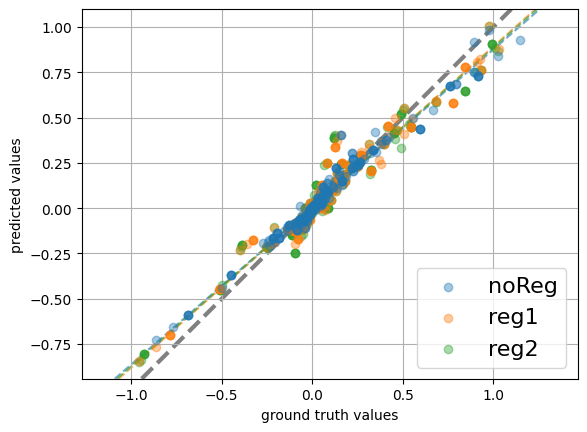

In [34]:
# Create two subplots and unpack the output array immediately

plt.axes().set_aspect('equal', 'datalim')

plt.scatter(gtFCC_noReg.melt()['value'], postFCC_noReg_meds['median'], alpha=0.4, label='noReg', zorder=300)
plt.scatter(gtFCC_reg1.melt()['value'], postFCC_reg1_meds['median'], alpha=0.4,  label='reg1', zorder=200)
plt.scatter(gtFCC_reg2.melt()['value'], postFCC_reg2_meds['median'], alpha=0.4,  label='reg2', zorder=100)

slope, intercept, _ = util.calculate_slope(gtFCC_noReg.melt()['value'], postFCC_noReg_meds['median'])
plt.axline((0, intercept), slope=slope, linestyle='--', alpha=0.6, color='tab:blue', zorder=0)

slope, intercept, _ = util.calculate_slope(gtFCC_reg1.melt()['value'], postFCC_reg1_meds['median'])
plt.axline((0, intercept), slope=slope, linestyle='--', alpha=0.6, color='tab:orange', zorder=0)

slope, intercept, _ = util.calculate_slope(gtFCC_reg2.melt()['value'], postFCC_reg2_meds['median'])
plt.axline((0, intercept), slope=slope, linestyle='--', alpha=0.6, color='tab:green', zorder=0)

plt.axline([0, 0], [1, 1], c='gray', linestyle='dashed', zorder=1, linewidth=3)
plt.grid()
plt.legend(loc="lower right", fontsize=16)

plt.xlabel('ground truth values')
plt.ylabel('predicted values')

    
f.tight_layout()

plt.savefig(f'../data/results/raw_svg_figures/top{topology}/top{topology}-{omission}-combinedFCCs_byAllostery.svg', format="svg")

### Comparing elasticity values with FCC values. 


In [28]:
ela_noReg_df

,0.1x,0.2x,0.3x,0.4x,0.5x,1.5x,3x,5x,7x,10x,median,min,max
0,0.012,0.006,0.010,0.003,-0.005,-0.003,0.009,-0.008,0.005,0.004,0.0045,-0.008,0.012
1,-0.338,-0.306,-0.239,-0.232,-0.208,-0.336,-0.403,-0.436,-0.437,-0.442,-0.3370,-0.442,-0.208
2,-0.015,0.005,0.008,0.000,0.004,0.001,-0.002,0.006,0.009,-0.004,0.0025,-0.015,0.009
3,0.006,-0.004,0.010,-0.003,0.007,0.004,0.008,-0.001,0.004,0.005,0.0045,-0.004,0.010
4,0.008,0.010,0.006,-0.003,0.006,-0.001,0.003,0.000,0.006,0.000,0.0045,-0.003,0.010
...,...,...,...,...,...,...,...,...,...,...,...,...,...
242,-0.004,-0.005,-0.001,0.000,0.006,0.000,0.000,0.006,0.009,0.004,0.0000,-0.005,0.009
243,-0.006,-0.005,-0.005,-0.001,-0.006,0.002,0.002,0.008,-0.005,0.005,-0.0030,-0.006,0.008
244,-0.020,-0.011,-0.011,-0.004,-0.007,-0.009,-0.013,-0.017,-0.040,-0.095,-0.0120,-0.095,-0.004
245,0.004,-0.003,0.006,-0.003,-0.007,0.002,-0.004,0.013,0.000,0.001,0.0005,-0.007,0.013


In [30]:
postFCC_noReg_meds

,0.1x,0.2x,0.3x,0.4x,0.5x,1.5x,3x,5x,7x,10x,median,min,max
0,-1.452365,-1.504568,-1.459433,-1.539324,-1.528220,-1.699724,-1.704990,-1.719983,-1.704306,-1.718776,-1.619524,-1.719983,-1.452365
1,0.980925,0.703016,0.692264,0.446629,0.411264,0.143485,0.201340,0.208049,0.225773,0.244899,0.328082,0.143485,0.980925
2,0.980925,0.703016,0.692264,0.446629,0.411264,0.143485,0.201340,0.208049,0.225773,0.244899,0.328082,0.143485,0.980925
3,0.419860,0.434212,0.495829,0.464819,0.489628,0.346517,0.322635,0.301242,0.316315,0.291937,0.383188,0.291937,0.495829
4,0.419860,0.434212,0.495829,0.464819,0.489628,0.346517,0.322635,0.301242,0.316315,0.291937,0.383188,0.291937,0.495829
...,...,...,...,...,...,...,...,...,...,...,...,...,...
356,-0.012204,-0.006490,-0.002531,-0.002283,-0.002511,-0.001045,-0.002450,-0.003086,-0.005191,-0.006964,-0.002808,-0.012204,-0.001045
357,-0.012204,-0.006490,-0.002531,-0.002283,-0.002511,-0.001045,-0.002450,-0.003086,-0.005191,-0.006964,-0.002808,-0.012204,-0.001045
358,-0.012204,-0.006490,-0.002531,-0.002283,-0.002511,-0.001045,-0.002450,-0.003086,-0.005191,-0.006964,-0.002808,-0.012204,-0.001045
359,0.210061,0.238124,0.248757,0.253647,0.260030,0.274622,0.250842,0.246343,0.243389,0.241421,0.247550,0.210061,0.274622


## Quantifying the number of FCCs in top ten that were predicted correctly by BMCA


In [11]:
rank_counts_df = pd.read_csv('../data/results/TopologyB_top10.csv')

In [12]:
stagbar_counts = rank_counts_df.pivot_table(index=['omittedData','type'], aggfunc=['mean',np.std])
stagbar_counts.reset_index(inplace=True)
stagbar_counts = stagbar_counts.reindex([1,0,7,6,3,2,9,8,5,4])
stagbar_counts

C:\Users\user\AppData\Local\Temp\ipykernel_7944\1542227218.py:1: FutureWarning:

pivot_table dropped a column because it failed to aggregate. This behavior is deprecated and will raise in a future version of pandas. Select only the columns that can be aggregated.

C:\Users\user\AppData\Local\Temp\ipykernel_7944\1542227218.py:1: FutureWarning:

The operation <function std at 0x00000241FF8BB1F0> failed on a column. If any error is raised, this will raise an exception in a future version of pandas. Drop these columns to avoid this warning.



,omittedData,type,mean,std
,,,count,count
1,allData,prior,6.100000,0.305129
0,allData,post,7.533333,0.937102
7,omitFluxes,prior,6.333333,0.479463
6,omitFluxes,post,6.100000,0.758856
3,omitEnzymes,prior,6.000000,0.262613
2,omitEnzymes,post,7.333333,0.711159
9,omitIntMet,prior,6.033333,0.182574
8,omitIntMet,post,6.233333,1.194335
5,omitExMet,prior,6.033333,0.182574


C:\Users\user\AppData\Local\Temp\ipykernel_7944\665701019.py:18: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



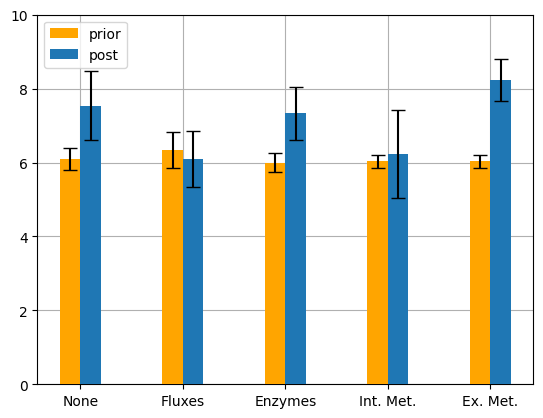

In [ ]:
ax = plt.subplot(111)
ax.grid()

ax.bar([i-0.1 for i in range(5)], stagbar_counts[stagbar_counts['type']=='prior']['mean']['count'].values,
        width=0.2, color='orange', align='center', zorder=100, label='prior')
plt.errorbar([i-0.1 for i in range(5)], 
             stagbar_counts[stagbar_counts['type']=='prior']['mean']['count'].values, 
             yerr=stagbar_counts[stagbar_counts['type']=='prior']['std']['count'].values, 
             ls='none', color='black', capsize=5, zorder=1000)

ax.bar([i+0.1 for i in range(5)], stagbar_counts[stagbar_counts['type']=='post']['mean']['count'].values,
        width=0.2, color='tab:blue', align='center', zorder=100, label='post')
plt.errorbar([i+0.1 for i in range(5)], 
             stagbar_counts[stagbar_counts['type']=='post']['mean']['count'].values, 
             yerr=stagbar_counts[stagbar_counts['type']=='post']['std']['count'].values, 
             ls='none', color='black', capsize=5, zorder=1000)

_ = ax.set_xticklabels([0, 'None', 'Fluxes', 'Enzymes', 'Int. Met.', 'Ex. Met.'])
_ = ax.set_yticks(range(0,12,2))
ax.legend()
plt.savefig(f'../data/results/raw_svg_figures/top{topology}_rankCounts.svg', format='svg')

C:\Users\user\AppData\Local\Temp\ipykernel_7944\694365876.py:1: FutureWarning:

pivot_table dropped a column because it failed to aggregate. This behavior is deprecated and will raise in a future version of pandas. Select only the columns that can be aggregated.

C:\Users\user\AppData\Local\Temp\ipykernel_7944\694365876.py:1: FutureWarning:

The operation <function std at 0x00000241FF8BB1F0> failed on a column. If any error is raised, this will raise an exception in a future version of pandas. Drop these columns to avoid this warning.

C:\Users\user\AppData\Local\Temp\ipykernel_7944\694365876.py:22: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



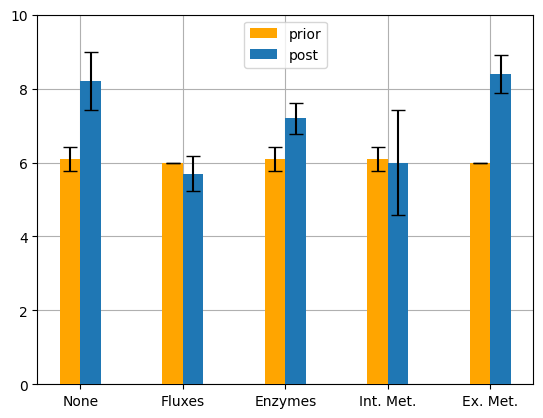

In [14]:
stagbar_counts = rank_counts_df[rank_counts_df['regulation']=='noReg'].pivot_table(index=['omittedData','type'], aggfunc=['mean',np.std])
stagbar_counts.reset_index(inplace=True)
stagbar_counts = stagbar_counts.reindex([1,0,7,6,3,2,9,8,5,4])

ax = plt.subplot(111)
ax.grid()

ax.bar([i-0.1 for i in range(5)], stagbar_counts[stagbar_counts['type']=='prior']['mean']['count'].values,
        width=0.2, color='orange', align='center', zorder=100, label='prior')
plt.errorbar([i-0.1 for i in range(5)], 
             stagbar_counts[stagbar_counts['type']=='prior']['mean']['count'].values, 
             yerr=stagbar_counts[stagbar_counts['type']=='prior']['std']['count'].values, 
             ls='none', color='black', capsize=5, zorder=1000)

ax.bar([i+0.1 for i in range(5)], stagbar_counts[stagbar_counts['type']=='post']['mean']['count'].values,
        width=0.2, color='tab:blue', align='center', zorder=100, label='post')
plt.errorbar([i+0.1 for i in range(5)], 
             stagbar_counts[stagbar_counts['type']=='post']['mean']['count'].values, 
             yerr=stagbar_counts[stagbar_counts['type']=='post']['std']['count'].values, 
             ls='none', color='black', capsize=5, zorder=1000)

_ = ax.set_xticklabels([0, 'None', 'Fluxes', 'Enzymes', 'Int. Met.', 'Ex. Met.'])
_ = ax.set_yticks(range(0,12,2))
ax.legend()
plt.savefig(f'../data/results/raw_svg_figures/top{topology}-noReg_rankCounts.svg', format='svg')

C:\Users\user\AppData\Local\Temp\ipykernel_7944\2509773324.py:1: FutureWarning:

pivot_table dropped a column because it failed to aggregate. This behavior is deprecated and will raise in a future version of pandas. Select only the columns that can be aggregated.

C:\Users\user\AppData\Local\Temp\ipykernel_7944\2509773324.py:1: FutureWarning:

The operation <function std at 0x00000241FF8BB1F0> failed on a column. If any error is raised, this will raise an exception in a future version of pandas. Drop these columns to avoid this warning.

C:\Users\user\AppData\Local\Temp\ipykernel_7944\2509773324.py:22: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



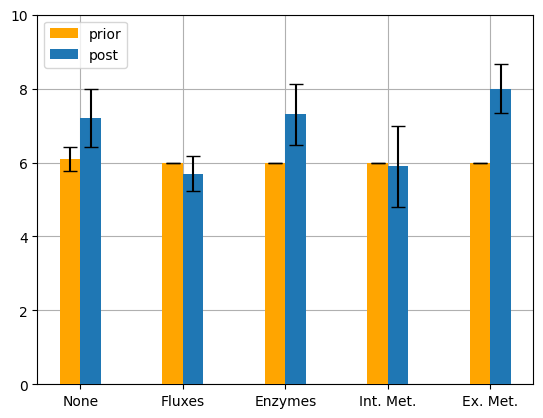

In [15]:
stagbar_counts = rank_counts_df[rank_counts_df['regulation']=='reg1'].pivot_table(index=['omittedData','type'], aggfunc=['mean',np.std])
stagbar_counts.reset_index(inplace=True)
stagbar_counts = stagbar_counts.reindex([1,0,7,6,3,2,9,8,5,4])

ax = plt.subplot(111)
ax.grid()

ax.bar([i-0.1 for i in range(5)], stagbar_counts[stagbar_counts['type']=='prior']['mean']['count'].values,
        width=0.2, color='orange', align='center', zorder=100, label='prior')
plt.errorbar([i-0.1 for i in range(5)], 
             stagbar_counts[stagbar_counts['type']=='prior']['mean']['count'].values, 
             yerr=stagbar_counts[stagbar_counts['type']=='prior']['std']['count'].values, 
             ls='none', color='black', capsize=5, zorder=1000)

ax.bar([i+0.1 for i in range(5)], stagbar_counts[stagbar_counts['type']=='post']['mean']['count'].values,
        width=0.2, color='tab:blue', align='center', zorder=100, label='post')
plt.errorbar([i+0.1 for i in range(5)], 
             stagbar_counts[stagbar_counts['type']=='post']['mean']['count'].values, 
             yerr=stagbar_counts[stagbar_counts['type']=='post']['std']['count'].values, 
             ls='none', color='black', capsize=5, zorder=1000)

_ = ax.set_xticklabels([0, 'None', 'Fluxes', 'Enzymes', 'Int. Met.', 'Ex. Met.'])
_ = ax.set_yticks(range(0,12,2))
ax.legend()
plt.savefig(f'../data/results/raw_svg_figures/top{topology}-reg1_rankCounts.svg', format='svg')

C:\Users\user\AppData\Local\Temp\ipykernel_7944\807162765.py:1: FutureWarning:

pivot_table dropped a column because it failed to aggregate. This behavior is deprecated and will raise in a future version of pandas. Select only the columns that can be aggregated.

C:\Users\user\AppData\Local\Temp\ipykernel_7944\807162765.py:1: FutureWarning:

The operation <function std at 0x00000241FF8BB1F0> failed on a column. If any error is raised, this will raise an exception in a future version of pandas. Drop these columns to avoid this warning.

C:\Users\user\AppData\Local\Temp\ipykernel_7944\807162765.py:22: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



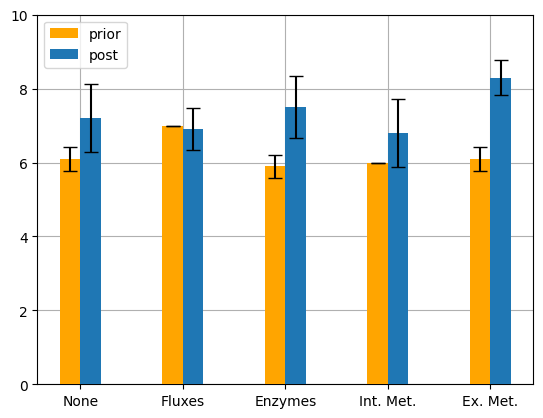

In [16]:
stagbar_counts = rank_counts_df[rank_counts_df['regulation']=='reg2'].pivot_table(index=['omittedData','type'], aggfunc=['mean',np.std])
stagbar_counts.reset_index(inplace=True)
stagbar_counts = stagbar_counts.reindex([1,0,7,6,3,2,9,8,5,4])

ax = plt.subplot(111)
ax.grid()

ax.bar([i-0.1 for i in range(5)], stagbar_counts[stagbar_counts['type']=='prior']['mean']['count'].values,
        width=0.2, color='orange', align='center', zorder=100, label='prior')
plt.errorbar([i-0.1 for i in range(5)], 
             stagbar_counts[stagbar_counts['type']=='prior']['mean']['count'].values, 
             yerr=stagbar_counts[stagbar_counts['type']=='prior']['std']['count'].values, 
             ls='none', color='black', capsize=5, zorder=1000)

ax.bar([i+0.1 for i in range(5)], stagbar_counts[stagbar_counts['type']=='post']['mean']['count'].values,
        width=0.2, color='tab:blue', align='center', zorder=100, label='post')
plt.errorbar([i+0.1 for i in range(5)], 
             stagbar_counts[stagbar_counts['type']=='post']['mean']['count'].values, 
             yerr=stagbar_counts[stagbar_counts['type']=='post']['std']['count'].values, 
             ls='none', color='black', capsize=5, zorder=1000)

_ = ax.set_xticklabels([0, 'None', 'Fluxes', 'Enzymes', 'Int. Met.', 'Ex. Met.'])
_ = ax.set_yticks(range(0,12,2))
ax.legend()
plt.savefig(f'../data/results/raw_svg_figures/top{topology}-reg2_rankCounts.svg', format='svg')

# Old Analyses

## Visualizing Spearman data 

### Condense Spearman data

In [ ]:
os.chdir('../data/results/spearman_coefficients/')

In [ ]:
spr_file_list = [i for i in os.listdir() if "topologyB" in i]

spr_dfs = []
for file in spr_file_list:
    a = pd.read_csv(file)

    reg = file.split('_')[0].split('-')[1]
    omit = file.split('_')[1]

    a['reg'] = [reg]*len(a)
    a['omit'] = [omit]*len(a)
    spr_dfs.append(a)

all_spr_df_B = pd.concat(spr_dfs)
all_spr_df_B

In [ ]:
os.chdir('../../../notebooks/')

In [ ]:
all_spr_df_B.rename(columns={'Unnamed: 0':'perturbation'}, inplace=True)
all_spr_df_B['perturbation'] = [float(i.split('x')[0]) for i in all_spr_df_B['perturbation']]

In [ ]:
all_spr_df_B = all_spr_df_B[all_spr_df_B['perturbation'] != 1.01]

In [ ]:
b = all_spr_df_B.pivot(index=['omit', 'reg'], columns='perturbation', values='r')
b

In [ ]:
fluxes_comp = all_spr_df_B.loc[(all_spr_df_B['reg'] =='reg2') & (all_spr_df_B['omit'].isin(['none', 'omitFluxes']))]
enzymes_comp = all_spr_df_B.loc[(all_spr_df_B['reg'] =='reg2') & (all_spr_df_B['omit'].isin(['none', 'omitEnzymes']))]
intMet_comp = all_spr_df_B.loc[(all_spr_df_B['reg'] =='reg2') & (all_spr_df_B['omit'].isin(['none', 'omitIntMet']))]
exMet_comp = all_spr_df_B.loc[(all_spr_df_B['reg'] =='reg2') & (all_spr_df_B['omit'].isin(['none', 'omitExMet']))]

### All-in-one scatter plots

In [ ]:
util.plt_spr_scatter(all_spr_df_B.loc[(all_spr_df_B['reg'] =='noReg')], 'Spearman rank coefficients, noReg')

In [ ]:
util.plt_spr_scatter(all_spr_df_B.loc[(all_spr_df_B['reg'] =='reg1')], 'Spearman rank coefficients, reg1')

In [ ]:
util.plt_spr_scatter(all_spr_df_B.loc[(all_spr_df_B['reg'] =='reg2')], 'Spearman rank coefficients, reg2')

## Visualizing MAE across the different types of data

In [ ]:
os.chdir('../data/results/MAE/')
MAE_file_list = [i for i in os.listdir() if "topologyB" in i]

MAE_dfs = []
for file in MAE_file_list:
    b = pd.read_csv(file)

    reg = file.split('_')[0].split('-')[1]
    omit = file.split('_')[1]

    b['reg'] = [reg]*len(b)
    b['omit'] = [omit]*len(b)
    MAE_dfs.append(b)

all_MAE_df_B = pd.concat(MAE_dfs)
all_MAE_df_B

os.chdir('../../../notebooks/')


In [ ]:
all_MAE_df_B.columns = ['perturbation', 'values', 'reg', 'omit']
all_MAE_df_B['values'] = all_MAE_df_B['values']/247
all_MAE_df_B

In [ ]:
# a = all_MAE_df_B.pivot(index=['omit', 'reg'], columns='perturbation', values='values')

all_MAE_df_B = all_MAE_df_B[all_MAE_df_B['perturbation'] != 1.01]
all_MAE_df_B = all_MAE_df_B[all_MAE_df_B['perturbation'] != 'knockout']


In [ ]:
noReg_df = all_MAE_df_B[all_MAE_df_B['reg'] == 'noReg']
noReg_df['r'] = noReg_df['values'].round(3)
noReg_df.head()

species = list(all_MAE_df_B['perturbation'].unique()[0:5])[::-1]
MAE_means = {
    'allData': tuple((noReg_df[noReg_df['omit'] == 'allData']['values']).values[1:6])[::-1],
    'omitFluxes': tuple((noReg_df[noReg_df['omit'] == 'omitFluxes']['values']).values[1:6])[::-1],
    'omitEnzymes': tuple((noReg_df[noReg_df['omit'] == 'omitEnzymes']['values']).values[1:6])[::-1],
    'omitIntMet': tuple((noReg_df[noReg_df['omit'] == 'omitIntMet']['values']).values[1:6])[::-1],
    'omitExMet': tuple((noReg_df[noReg_df['omit'] == 'omitExMet']['values']).values[1:6])[::-1]
}

x = np.arange(len(species))  # the label locations
width = 0.15  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(figsize=(12,4), layout='constrained', )

for attribute, measurement in MAE_means.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute, zorder=100)
    multiplier += 1

plt.legend(bbox_to_anchor=(1.02, 1), loc="upper left")
plt.grid(True, which='both', axis='both', zorder=0)
plt.axhline(y=0, color='k', linewidth=3, zorder=500)

ax.set_xticks(x + width, ['50','60','70','80','90'])


# add a big axis, hide frame
fig.add_subplot(111, frameon=False)
# hide tick and tick label of the big axis
plt.tick_params(labelcolor='none', which='both', top=False, bottom=False, left=False, right=False)
plt.xlabel("% repression in enzyme concentration", size=14)
plt.ylabel("MAE\n", size=14)

fig.suptitle("MAE for predicted elasticities at different perturbation strengths, B-noReg", size=20)


In [ ]:
reg1_df = all_MAE_df_B[all_MAE_df_B['reg'] == 'reg1']
reg1_df['r'] = reg1_df['values'].round(3)
reg1_df.head()

species = list(all_MAE_df_B['perturbation'].unique()[0:5])[::-1]
MAE_means = {
    'allData': tuple((reg1_df[reg1_df['omit'] == 'allData']['values']).values[1:6])[::-1],
    'omitFluxes': tuple((reg1_df[reg1_df['omit'] == 'omitFluxes']['values']).values[1:6])[::-1],
    'omitEnzymes': tuple((reg1_df[reg1_df['omit'] == 'omitEnzymes']['values']).values[1:6])[::-1],
    'omitIntMet': tuple((reg1_df[reg1_df['omit'] == 'omitIntMet']['values']).values[1:6])[::-1],
    'omitExMet': tuple((reg1_df[reg1_df['omit'] == 'omitExMet']['values']).values[1:6])[::-1]
}

x = np.arange(len(species))  # the label locations
width = 0.15  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(figsize=(12,4), layout='constrained', )

for attribute, measurement in MAE_means.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute, zorder=100)
    multiplier += 1

plt.legend(bbox_to_anchor=(1.02, 1), loc="upper left")
plt.grid(True, which='both', axis='both', zorder=0)
plt.axhline(y=0, color='k', linewidth=3, zorder=500)

ax.set_xticks(x + width, ['50','60','70','80','90'])

# add a big axis, hide frame
fig.add_subplot(111, frameon=False)
# hide tick and tick label of the big axis
plt.tick_params(labelcolor='none', which='both', top=False, bottom=False, left=False, right=False)
plt.xlabel("% repression in enzyme concentration", size=14)
plt.ylabel("MAE\n", size=14)

fig.suptitle("MAE for predicted elasticities at different perturbation strengths, B-reg1", size=20)


In [ ]:
reg2_df = all_MAE_df_B[all_MAE_df_B['reg'] == 'reg2']
reg2_df['r'] = reg2_df['values'].round(3)
reg2_df.head()

species = list(all_MAE_df_B['perturbation'].unique()[0:5])[::-1]
MAE_means = {
    'allData': tuple((reg2_df[reg2_df['omit'] == 'allData']['values']).values[1:6])[::-1],
    'omitFluxes': tuple((reg2_df[reg2_df['omit'] == 'omitFluxes']['values']).values[1:6])[::-1],
    'omitEnzymes': tuple((reg2_df[reg2_df['omit'] == 'omitEnzymes']['values']).values[1:6])[::-1],
    'omitIntMet': tuple((reg2_df[reg2_df['omit'] == 'omitIntMet']['values']).values[1:6])[::-1],
    'omitExMet': tuple((reg2_df[reg2_df['omit'] == 'omitExMet']['values']).values[1:6])[::-1]
}

x = np.arange(len(species))  # the label locations
width = 0.15  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(figsize=(12,4), layout='constrained', )

for attribute, measurement in MAE_means.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute, zorder=100)
    multiplier += 1

plt.legend(bbox_to_anchor=(1.02, 1), loc="upper left")
plt.grid(True, which='both', axis='both', zorder=0)
plt.axhline(y=0, color='k', linewidth=3, zorder=500)
ax.set_xticks(x + width, ['50','60','70','80','90'])

# add a big axis, hide frame
fig.add_subplot(111, frameon=False)
# hide tick and tick label of the big axis
plt.tick_params(labelcolor='none', which='both', top=False, bottom=False, left=False, right=False)
plt.xlabel("% repression in enzyme concentration", size=14)
plt.ylabel("MAE\n", size=14)

fig.suptitle("MAE for predicted elasticities at different perturbation strengths, B-reg2", size=20)


In [ ]:
species = list(all_MAE_df_B['perturbation'].unique()[6:])
MAE_means = {
    'allData': tuple((noReg_df[noReg_df['omit'] == 'allData']['values']).values[6:]),
    'omitFluxes': tuple((noReg_df[noReg_df['omit'] == 'omitFluxes']['values']).values[6:]),
    'omitEnzymes': tuple((noReg_df[noReg_df['omit'] == 'omitEnzymes']['values']).values[6:]),
    'omitIntMet': tuple((noReg_df[noReg_df['omit'] == 'omitIntMet']['values']).values[6:]),
    'omitExMet': tuple((noReg_df[noReg_df['omit'] == 'omitExMet']['values']).values[6:])
}

x = np.arange(len(species))  # the label locations
width = 0.15  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(figsize=(12,4), layout='constrained', )

for attribute, measurement in MAE_means.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute, zorder=100)
    multiplier += 1

plt.legend(bbox_to_anchor=(1.02, 1), loc="upper left")
plt.grid(True, which='both', axis='both', zorder=0)
plt.axhline(y=0, color='k', linewidth=3, zorder=500)
ax.set_xticks(x + width, ['1.5','3','5','7','10'])

# add a big axis, hide frame
fig.add_subplot(111, frameon=False)
# hide tick and tick label of the big axis
plt.tick_params(labelcolor='none', which='both', top=False, bottom=False, left=False, right=False)
plt.xlabel("fold change perturbations in enzyme concentration", size=14)
plt.ylabel("MAE\n", size=14)

fig.suptitle("CRISPRa MAE for predicted elasticities at different perturbation strengths, B-noReg", size=20)


In [ ]:
species = list(all_MAE_df_B['perturbation'].unique()[6:])
MAE_means = {
    'allData': tuple((reg1_df[reg1_df['omit'] == 'allData']['values']).values[6:]),
    'omitFluxes': tuple((reg1_df[reg1_df['omit'] == 'omitFluxes']['values']).values[6:]),
    'omitEnzymes': tuple((reg1_df[reg1_df['omit'] == 'omitEnzymes']['values']).values[6:]),
    'omitIntMet': tuple((reg1_df[reg1_df['omit'] == 'omitIntMet']['values']).values[6:]),
    'omitExMet': tuple((reg1_df[reg1_df['omit'] == 'omitExMet']['values']).values[6:])
}

x = np.arange(len(species))  # the label locations
width = 0.15  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(figsize=(12,4), layout='constrained', )

for attribute, measurement in MAE_means.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute, zorder=100)
    multiplier += 1

plt.legend(bbox_to_anchor=(1.02, 1), loc="upper left")
plt.grid(True, which='both', axis='both', zorder=0)
plt.axhline(y=0, color='k', linewidth=3, zorder=500)
ax.set_xticks(x + width, ['1.5','3','5','7','10'])

# add a big axis, hide frame
fig.add_subplot(111, frameon=False)
# hide tick and tick label of the big axis
plt.tick_params(labelcolor='none', which='both', top=False, bottom=False, left=False, right=False)
plt.xlabel("fold change perturbations in enzyme concentration", size=14)
plt.ylabel("MAE\n", size=14)

fig.suptitle("CRISPRa MAE for predicted elasticities at different perturbation strengths, B-reg1", size=20)


In [ ]:
species = list(all_MAE_df_B['perturbation'].unique()[6:])
MAE_means = {
    'allData': tuple((reg2_df[reg2_df['omit'] == 'allData']['values']).values[6:]),
    'omitFluxes': tuple((reg2_df[reg2_df['omit'] == 'omitFluxes']['values']).values[6:]),
    'omitEnzymes': tuple((reg2_df[reg2_df['omit'] == 'omitEnzymes']['values']).values[6:]),
    'omitIntMet': tuple((reg2_df[reg2_df['omit'] == 'omitIntMet']['values']).values[6:]),
    'omitExMet': tuple((reg2_df[reg2_df['omit'] == 'omitExMet']['values']).values[6:])
}

x = np.arange(len(species))  # the label locations
width = 0.15  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(figsize=(12,4), layout='constrained', )

for attribute, measurement in MAE_means.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute, zorder=100)
    multiplier += 1

plt.legend(bbox_to_anchor=(1.02, 1), loc="upper left")
plt.grid(True, which='both', axis='both', zorder=0)
plt.axhline(y=0, color='k', linewidth=3, zorder=500)
ax.set_xticks(x + width, ['1.5','3','5','7','10'])

# add a big axis, hide frame
fig.add_subplot(111, frameon=False)
# hide tick and tick label of the big axis
plt.tick_params(labelcolor='none', which='both', top=False, bottom=False, left=False, right=False)
plt.xlabel("fold change perturbations in enzyme concentration", size=14)
plt.ylabel("MAE\n", size=14)

fig.suptitle("CRISPRa MAE for predicted elasticities at different perturbation strengths, B-reg2", size=20)


## Comparing Spearman r coefficients pairwise to find significant differences

In [ ]:
def plot_CI_comparisons(subplot, omitted_type, reg_level, CRISPRi=True, color='orange'):

    if CRISPRi: 
        df1 = all_spr_df_B[(all_spr_df_B['reg']==reg_level) & (all_spr_df_B['omit']=='allData')][0:5]
        df2 = all_spr_df_B[(all_spr_df_B['reg']==reg_level) & (all_spr_df_B['omit']==f'omit{omitted_type}')][0:5]

        x1 = np.linspace(90,50,5)
        x2 = np.linspace(90,50,5)

    else:
        df1 = all_spr_df_B[(all_spr_df_B['reg']==reg_level) & (all_spr_df_B['omit']=='allData')][5:10]
        df2 = all_spr_df_B[(all_spr_df_B['reg']==reg_level) & (all_spr_df_B['omit']==f'omit{omitted_type}')][5:10]

        x1 = df1['perturbation']
        x2 = df2['perturbation']

    ymin1 = (df1['r'] - df1['lower']).values
    ymax1 = (df1['upper'] - df1['r']).values

    ymin2 = (df2['r'] - df2['lower']).values
    ymax2 = (df2['upper'] - df2['r']).values

    subplot.scatter(x1, 
                abs(df1['r']), alpha=0.8, s=40, zorder=1000, label='all data', 
                color='red')
    subplot.errorbar(x1, df1['r'], yerr=np.stack((ymin1, ymax1)), 
                 linestyle='None', color='red', zorder=100)

    subplot.scatter(x2, 
                abs(df2['r']), alpha=0.8, s=100, zorder=50, 
                label=f'omit {omitted_type}', c=color)
    subplot.errorbar(x2, df2['r'], yerr=np.stack((ymin2, ymax2)), 
                 elinewidth=6, linestyle='None', c=color, zorder=10,
                 alpha=0.8)

    subplot.grid(True, which='both', axis='both', zorder=0)
    subplot.set_ylim([0,1])
        

In [ ]:
fig, ax = plt.subplots(4, 3, figsize=(12,8), sharex=True)
plot_CI_comparisons(ax[0,0], "Fluxes", "noReg")
plot_CI_comparisons(ax[0,1], "Fluxes", "reg1", color='green')
plot_CI_comparisons(ax[0,2], "Fluxes", "reg2", color='blue')

plot_CI_comparisons(ax[1,0], "Enzymes", "noReg")
plot_CI_comparisons(ax[1,1], "Enzymes", "reg1", color='green')
plot_CI_comparisons(ax[1,2], "Enzymes", "reg2", color='blue')

plot_CI_comparisons(ax[2,0], "IntMet", "noReg")
plot_CI_comparisons(ax[2,1], "IntMet", "reg1", color='green')
plot_CI_comparisons(ax[2,2], "IntMet", "reg2", color='blue')

plot_CI_comparisons(ax[3,0], "ExMet", "noReg")
plot_CI_comparisons(ax[3,1], "ExMet", "reg1", color='green')
plot_CI_comparisons(ax[3,2], "ExMet", "reg2", color='blue')

fig.text(0.05, 0.9, 'omitted\ndata')
fig.text(0.22, 0.9, 'noReg')
fig.text(0.5, 0.9, 'reg1')
fig.text(0.77, 0.9, 'reg2')

fig.text(0.07, 0.77, 'fluxes', rotation=90, rotation_mode='anchor')
fig.text(0.07, 0.55, 'enzymes', rotation=90, rotation_mode='anchor')
fig.text(0.07, 0.35, 'internal mets', rotation=90, rotation_mode='anchor')
fig.text(0.07, 0.13, 'external mets', rotation=90, rotation_mode='anchor')

# add a big axis, hide frame
fig.add_subplot(111, frameon=False)
# hide tick and tick label of the big axis
plt.tick_params(labelcolor='none', which='both', top=False, bottom=False, left=False, right=False)
plt.xlabel("% repression in enzyme concentration")
plt.ylabel(r"spearman coefficient, $\rho$")

fig.suptitle("TopologyB--Comparing CRISPRi datasets with omitted data at different regulation levels", size=20)


In [ ]:
fig, ax = plt.subplots(4, 3, figsize=(12,8), sharex=True)
plot_CI_comparisons(ax[0,0], "Fluxes", "noReg", CRISPRi=False)
plot_CI_comparisons(ax[0,1], "Fluxes", "reg1", CRISPRi=False, color='green')
plot_CI_comparisons(ax[0,2], "Fluxes", "reg2", CRISPRi=False, color='blue')

plot_CI_comparisons(ax[1,0], "Enzymes", "noReg", CRISPRi=False)
plot_CI_comparisons(ax[1,1], "Enzymes", "reg1", CRISPRi=False, color='green')
plot_CI_comparisons(ax[1,2], "Enzymes", "reg2", CRISPRi=False, color='blue')

plot_CI_comparisons(ax[2,0], "IntMet", "noReg", CRISPRi=False)
plot_CI_comparisons(ax[2,1], "IntMet", "reg1", CRISPRi=False, color='green')
plot_CI_comparisons(ax[2,2], "IntMet", "reg2", CRISPRi=False, color='blue')

plot_CI_comparisons(ax[3,0], "ExMet", "noReg", CRISPRi=False)
plot_CI_comparisons(ax[3,1], "ExMet", "reg1", CRISPRi=False, color='green')
plot_CI_comparisons(ax[3,2], "ExMet", "reg2", CRISPRi=False, color='blue')


fig.text(0.05, 0.9, 'omitted\ndata')
fig.text(0.22, 0.9, 'noReg')
fig.text(0.5, 0.9, 'reg1')
fig.text(0.77, 0.9, 'reg2')

fig.text(0.07, 0.77, 'fluxes', rotation=90, rotation_mode='anchor')
fig.text(0.07, 0.55, 'enzymes', rotation=90, rotation_mode='anchor')
fig.text(0.07, 0.35, 'internal mets', rotation=90, rotation_mode='anchor')
fig.text(0.07, 0.13, 'external mets', rotation=90, rotation_mode='anchor')

# add a big axis, hide frame
fig.add_subplot(111, frameon=False)
# hide tick and tick label of the big axis
plt.tick_params(labelcolor='none', which='both', top=False, bottom=False, left=False, right=False)
plt.xlabel("fold change in enzyme concentration")
plt.ylabel(r"spearman coefficient, $\rho$")

fig.suptitle("TopologyB--Comparing CRISPRa datasets with omitted data at different regulations levels", size=20)


## Comprehensive bar plots

In [ ]:
B_noReg_df = all_spr_df_B[all_spr_df_B['reg'] == 'noReg']
B_noReg_df['r'] = B_noReg_df['r'].round(3)
B_noReg_df['ymin'] = B_noReg_df['r'] - B_noReg_df['lower']
B_noReg_df['ymax'] = B_noReg_df['upper'] - B_noReg_df['r']

B_reg1_df = all_spr_df_B[all_spr_df_B['reg'] == 'reg1']
B_reg1_df['r'] = B_reg1_df['r'].round(3)
B_reg1_df['ymin'] = B_reg1_df['r'] - B_reg1_df['lower']
B_reg1_df['ymax'] = B_reg1_df['upper'] - B_reg1_df['r']

B_reg2_df = all_spr_df_B[all_spr_df_B['reg'] == 'reg2']
B_reg2_df['r'] = B_reg2_df['r'].round(3)
B_reg2_df['ymin'] = B_reg2_df['r'] - B_reg2_df['lower']
B_reg2_df['ymax'] = B_reg2_df['upper'] - B_reg2_df['r']

In [ ]:
species = list(B_noReg_df['perturbation'].unique()[0:5])[::-1]

# these are the r values for CRISPRi, but in reverse order
penguin_means = {
    'allData': tuple((B_noReg_df[B_noReg_df['omit'] == 'allData']['r']).values[0:5])[::-1],
    'omitFluxes': tuple((B_noReg_df[B_noReg_df['omit'] == 'omitFluxes']['r']).values[0:5])[::-1],
    'omitEnzymes': tuple((B_noReg_df[B_noReg_df['omit'] == 'omitEnzymes']['r']).values[0:5])[::-1],
    'omitIntMet': tuple((B_noReg_df[B_noReg_df['omit'] == 'omitIntMet']['r']).values[0:5])[::-1],
    'omitExMet': tuple((B_noReg_df[B_noReg_df['omit'] == 'omitExMet']['r']).values[0:5])[::-1]
}

x = np.arange(len(species))  # the label locations
width = 0.15  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(figsize=(12,4), layout='constrained', )

for attribute, measurement in penguin_means.items():
    offset = width * multiplier
    ymin = ((B_noReg_df[B_noReg_df['omit'] == attribute]['ymin']).values[0:5])[::-1]
    ymax = ((B_noReg_df[B_noReg_df['omit'] == attribute]['ymax']).values[0:5])[::-1]
    rects = ax.bar(x + offset, measurement, width, label=attribute, zorder=100)
    ax.errorbar(x + offset, measurement, yerr=np.stack((ymin, ymax)), 
                 linestyle='None', color='k', linewidth=1.4, zorder=100)
    
    multiplier += 1

plt.legend(bbox_to_anchor=(1.02, 1), loc="upper left")
plt.grid(True, which='both', axis='both', zorder=0)
plt.axhline(y=0, color='k', linewidth=3, zorder=500)
# plt.ylim((0,1))
plt.ylim((-0.7,1))
ax.set_xticks(x + width, ['50','60','70','80','90'])


# add a big axis, hide frame
fig.add_subplot(111, frameon=False)
# hide tick and tick label of the big axis
plt.tick_params(labelcolor='none', which='both', top=False, bottom=False, left=False, right=False)
plt.xlabel("% repression in enzyme concentration", size=14)
plt.ylabel(r"spearman coefficient, $\rho$", size=14)

fig.suptitle("Comparing CRISPRi datasets with omitted data at different regulations levels, B-noReg", size=20)


In [ ]:
species = B_noReg_df['perturbation'].unique()[5:10]
penguin_means = {
    'allData': tuple((B_noReg_df[B_noReg_df['omit'] == 'allData']['r']).values[5:10]),
    'omitFluxes': tuple((B_noReg_df[B_noReg_df['omit'] == 'omitFluxes']['r']).values[5:10]),
    'omitEnzymes': tuple((B_noReg_df[B_noReg_df['omit'] == 'omitEnzymes']['r']).values[5:10]),
    'omitIntMet': tuple((B_noReg_df[B_noReg_df['omit'] == 'omitIntMet']['r']).values[5:10]),
    'omitExMet': tuple((B_noReg_df[B_noReg_df['omit'] == 'omitExMet']['r']).values[5:10])
}

x = np.arange(len(species))  # the label locations
width = 0.15  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(figsize=(12,4), layout='constrained', )

for attribute, measurement in penguin_means.items():
    offset = width * multiplier
    
    ymin = ((B_noReg_df[B_noReg_df['omit'] == attribute]['ymin']).values[5:10])[::-1]
    ymax = ((B_noReg_df[B_noReg_df['omit'] == attribute]['ymax']).values[5:10])[::-1]
    
    rects = ax.bar(x + offset, measurement, width, label=attribute, zorder=100)
    ax.errorbar(x + offset, measurement, yerr=np.stack((ymin, ymax)), 
                 linestyle='None', color='k', zorder=100)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xticks(x + width, species)
plt.legend(bbox_to_anchor=(1.02, 1), loc="upper left")
plt.grid(True, which='both', axis='both', zorder=0)
plt.axhline(y=0, color='k', linewidth=3, zorder=500)
plt.ylim((0,1))

# add a big axis, hide frame
fig.add_subplot(111, frameon=False)
# hide tick and tick label of the big axis
plt.tick_params(labelcolor='none', which='both', top=False, bottom=False, left=False, right=False)
plt.xlabel("fold change in enzyme concentration", size=14)
plt.ylabel(r"spearman coefficient, $\rho$", size=14)
fig.suptitle("Comparing CRISPRa datasets with omitted data at different regulations levels, B-noReg", size=20)


In [ ]:
species = list(B_reg1_df['perturbation'].unique()[0:5])[::-1]
penguin_means = {
    'allData': tuple((B_reg1_df[B_reg1_df['omit'] == 'allData']['r']).values[0:5])[::-1],
    'omitFluxes': tuple((B_reg1_df[B_reg1_df['omit'] == 'omitFluxes']['r']).values[0:5])[::-1],
    'omitEnzymes': tuple((B_reg1_df[B_reg1_df['omit'] == 'omitEnzymes']['r']).values[0:5])[::-1],
    'omitIntMet': tuple((B_reg1_df[B_reg1_df['omit'] == 'omitIntMet']['r']).values[0:5])[::-1],
    'omitExMet': tuple((B_reg1_df[B_reg1_df['omit'] == 'omitExMet']['r']).values[0:5])[::-1]
}

x = np.arange(len(species))  # the label locations
width = 0.15  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(figsize=(12,4), layout='constrained', )

for attribute, measurement in penguin_means.items():
    offset = width * multiplier

    ymin = ((B_reg1_df[B_reg1_df['omit'] == attribute]['ymin']).values[0:5])[::-1]
    ymax = ((B_reg1_df[B_reg1_df['omit'] == attribute]['ymax']).values[0:5])[::-1]

    rects = ax.bar(x + offset, measurement, width, label=attribute, zorder=100)
    ax.errorbar(x + offset, measurement, yerr=np.stack((ymin, ymax)), 
                 linestyle='None', color='k', linewidth=1.4, zorder=100)
    multiplier += 1

plt.legend(bbox_to_anchor=(1.02, 1), loc="upper left")
plt.grid(True, which='both', axis='both', zorder=0)
plt.axhline(y=0, color='k', linewidth=3, zorder=500)
plt.ylim((0,1))
ax.set_xticks(x + width, ['50','60','70','80','90'])

# add a big axis, hide frame
fig.add_subplot(111, frameon=False)
# hide tick and tick label of the big axis
plt.tick_params(labelcolor='none', which='both', top=False, bottom=False, left=False, right=False)
plt.xlabel("% repression in enzyme concentration", size=14)
plt.ylabel(r"spearman coefficient, $\rho$", size=14)

fig.suptitle("Comparing CRISPRi datasets with omitted data at different regulations levels, B-reg1", size=20)


In [ ]:
species = B_reg1_df['perturbation'].unique()[5:10]
penguin_means = {
    'allData': tuple((B_reg1_df[B_reg1_df['omit'] == 'allData']['r']).values[5:10]),
    'omitFluxes': tuple((B_reg1_df[B_reg1_df['omit'] == 'omitFluxes']['r']).values[5:10]),
    'omitEnzymes': tuple((B_reg1_df[B_reg1_df['omit'] == 'omitEnzymes']['r']).values[5:10]),
    'omitIntMet': tuple((B_reg1_df[B_reg1_df['omit'] == 'omitIntMet']['r']).values[5:10]),
    'omitExMet': tuple((B_reg1_df[B_reg1_df['omit'] == 'omitExMet']['r']).values[5:10])
}


x = np.arange(len(species))  # the label locations
width = 0.15  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(figsize=(12,4), layout='constrained', )

for attribute, measurement in penguin_means.items():
    offset = width * multiplier

    ymin = ((B_reg1_df[B_reg1_df['omit'] == attribute]['ymin']).values[5:10])[::-1]
    ymax = ((B_reg1_df[B_reg1_df['omit'] == attribute]['ymax']).values[5:10])[::-1]

    rects = ax.bar(x + offset, measurement, width, label=attribute, zorder=100)
    ax.errorbar(x + offset, measurement, yerr=np.stack((ymin, ymax)), 
                 linestyle='None', color='k', zorder=100)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xticks(x + width, species)
plt.legend(bbox_to_anchor=(1.02, 1), loc="upper left")
plt.grid(True, which='both', axis='both', zorder=0)
plt.axhline(y=0, color='k', linewidth=3, zorder=500)
plt.ylim((0,1))

# add a big axis, hide frame
fig.add_subplot(111, frameon=False)
# hide tick and tick label of the big axis
plt.tick_params(labelcolor='none', which='both', top=False, bottom=False, left=False, right=False)
plt.xlabel("fold change in enzyme concentration", size=14)
plt.ylabel(r"spearman coefficient, $\rho$", size=14)
fig.suptitle("Comparing CRISPRa datasets with omitted data at different regulations levels, B-reg1", size=20)


In [ ]:
species = list(B_reg2_df['perturbation'].unique()[0:5])[::-1]
penguin_means = {
    'allData': tuple((B_reg2_df[B_reg2_df['omit'] == 'allData']['r']).values[0:5])[::-1],
    'omitFluxes': tuple((B_reg2_df[B_reg2_df['omit'] == 'omitFluxes']['r']).values[0:5])[::-1],
    'omitEnzymes': tuple((B_reg2_df[B_reg2_df['omit'] == 'omitEnzymes']['r']).values[0:5])[::-1],
    'omitIntMet': tuple((B_reg2_df[B_reg2_df['omit'] == 'omitIntMet']['r']).values[0:5])[::-1],
    'omitExMet': tuple((B_reg2_df[B_reg2_df['omit'] == 'omitExMet']['r']).values[0:5])[::-1]
}

x = np.arange(len(species))  # the label locations
width = 0.15  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(figsize=(12,4), layout='constrained', )

for attribute, measurement in penguin_means.items():
    offset = width * multiplier

    ymin = ((B_reg2_df[B_reg2_df['omit'] == attribute]['ymin']).values[0:5])[::-1]
    ymax = ((B_reg2_df[B_reg2_df['omit'] == attribute]['ymax']).values[0:5])[::-1]

    rects = ax.bar(x + offset, measurement, width, label=attribute, zorder=100)
    ax.errorbar(x + offset, measurement, yerr=np.stack((ymin, ymax)), 
                 linestyle='None', color='k', linewidth=1.4, zorder=100)
    multiplier += 1

plt.legend(bbox_to_anchor=(1.02, 1), loc="upper left")
plt.grid(True, which='both', axis='both', zorder=0)
plt.axhline(y=0, color='k', linewidth=3, zorder=500)
plt.ylim((0,1))
ax.set_xticks(x + width, ['50','60','70','80','90'])


# add a big axis, hide frame
fig.add_subplot(111, frameon=False)
# hide tick and tick label of the big axis
plt.tick_params(labelcolor='none', which='both', top=False, bottom=False, left=False, right=False)
plt.xlabel("% repression in enzyme concentration", size=14)
plt.ylabel(r"spearman coefficient, $\rho$", size=14)

fig.suptitle("Comparing CRISPRi datasets with omitted data at different regulations levels, B-reg2", size=20)


In [ ]:
species = B_reg2_df['perturbation'].unique()[5:10]
penguin_means = {
    'allData': tuple((B_reg2_df[B_reg2_df['omit'] == 'allData']['r']).values[5:10]),
    'omitFluxes': tuple((B_reg2_df[B_reg2_df['omit'] == 'omitFluxes']['r']).values[5:10]),
    'omitEnzymes': tuple((B_reg2_df[B_reg2_df['omit'] == 'omitEnzymes']['r']).values[5:10]),
    'omitIntMet': tuple((B_reg2_df[B_reg2_df['omit'] == 'omitIntMet']['r']).values[5:10]),
    'omitExMet': tuple((B_reg2_df[B_reg2_df['omit'] == 'omitExMet']['r']).values[5:10])
}

x = np.arange(len(species))  # the label locations
width = 0.15  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(figsize=(12,4), layout='constrained', )

for attribute, measurement in penguin_means.items():
    offset = width * multiplier

    ymin = ((B_reg2_df[B_reg2_df['omit'] == attribute]['ymin']).values[5:10])[::-1]
    ymax = ((B_reg2_df[B_reg2_df['omit'] == attribute]['ymax']).values[5:10])[::-1]

    rects = ax.bar(x + offset, measurement, width, label=attribute, zorder=100)
    ax.errorbar(x + offset, measurement, yerr=np.stack((ymin, ymax)), 
                 linestyle='None', color='k', zorder=100)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xticks(x + width, species)
plt.legend(bbox_to_anchor=(1.02, 1), loc="upper left")
plt.grid(True, which='both', axis='both', zorder=0)
plt.axhline(y=0, color='k', linewidth=3, zorder=500)
plt.ylim((0,1))

# add a big axis, hide frame
fig.add_subplot(111, frameon=False)
# hide tick and tick label of the big axis
plt.tick_params(labelcolor='none', which='both', top=False, bottom=False, left=False, right=False)
plt.xlabel("fold change in enzyme concentration", size=14)
plt.ylabel(r"spearman coefficient, $\rho$", size=14)
fig.suptitle("Comparing CRISPRa datasets with omitted data at different regulations levels, B-reg2", size=20)


## Make tables of ranking correctness

In [ ]:
os.chdir('../data/results/rankings/')

In [ ]:
rank_file_list = [i for i in os.listdir() if "topologyB" in i]

rank_dfs = []
for file in rank_file_list:
    a = pd.read_csv(file)

    reg = file.split('_')[0].split('-')[1]
    omit = file.split('_')[1]

    a['reg'] = [reg]*len(a)
    a['omit'] = [omit]*len(a)
    rank_dfs.append(a)

all_rank_df_B = pd.concat(rank_dfs)# .drop('1.01x', axis=1)
all_rank_df_B

In [ ]:
os.chdir('../../../notebooks/')

#### Counts of top three ranked FCCs

In [ ]:
pt_labels = ['0.1x', '0.2x', '0.3x', '0.4x', '0.5x', '1.5x', '3x', '5x', '7x', '10x']

In [ ]:
topThree_df = all_rank_df_B[all_rank_df_B['v19'].isin([1, 2, 3])]

gt_ranks = all_rank_df_B['gt'].head(19)

rank_noReg = topThree_df[topThree_df['reg']=='noReg']#.drop('gt', axis=1)
rank_reg1 = topThree_df[topThree_df['reg']=='reg1']#.drop('gt', axis=1)
rank_reg2 = topThree_df[topThree_df['reg']=='reg2']#.drop('gt', axis=1)

In [ ]:
rank_noReg

In [ ]:
gt_t3 = rank_noReg.groupby('omit')['gt'].apply(list).reset_index()
gt_t3_sets = np.where(gt_t3['gt']=='','', gt_t3['gt'].map(set))
gt_t3_sets

t3_sets = []
for pt in pt_labels: 
    t3 = rank_noReg.groupby('omit')[pt].apply(list).reset_index()
    t3_sets.append(np.where(t3[pt]=='','', t3[pt].map(set)))

scores=[]
for i in t3_sets: 
    for ii, gt_t3 in enumerate(gt_t3_sets): 
        scores.append(len(set.intersection(gt_t3, i[ii])))

t3_results = pd.DataFrame((np.array(scores)).reshape((len(pt_labels),-1)).T, 
             index=all_rank_df_B['omit'].unique(), columns=pt_labels)
t3_results

In [ ]:
gt_t3 = rank_reg1.groupby('omit')['gt'].apply(list).reset_index()
gt_t3_sets = np.where(gt_t3['gt']=='','', gt_t3['gt'].map(set))
gt_t3_sets

t3_sets = []
for pt in pt_labels: 
    t3 = rank_reg1.groupby('omit')[pt].apply(list).reset_index()
    t3_sets.append(np.where(t3[pt]=='','', t3[pt].map(set)))

scores=[]
for i in t3_sets: 
    for ii, gt_t3 in enumerate(gt_t3_sets): 
        scores.append(len(set.intersection(gt_t3, i[ii])))

t3_results = pd.DataFrame((np.array(scores)).reshape((len(pt_labels),-1)).T, 
             index=all_rank_df_B['omit'].unique(), columns=pt_labels)
t3_results

In [ ]:
gt_t3 = rank_reg2.groupby('omit')['gt'].apply(list).reset_index()
gt_t3_sets = np.where(gt_t3['gt']=='','', gt_t3['gt'].map(set))
gt_t3_sets

t3_sets = []
for pt in pt_labels: 
    t3 = rank_reg2.groupby('omit')[pt].apply(list).reset_index()
    t3_sets.append(np.where(t3[pt]=='','', t3[pt].map(set)))

scores=[]
for i in t3_sets: 
    for ii, gt_t3 in enumerate(gt_t3_sets): 
        scores.append(len(set.intersection(gt_t3, i[ii])))

t3_results = pd.DataFrame((np.array(scores)).reshape((len(pt_labels),-1)).T, 
             index=all_rank_df_B['omit'].unique(), columns=pt_labels)
t3_results

In [ ]:
# visualizations. Heatmaps?

#### Counts of top five ranked FCCs

In [ ]:
topFive_df = all_rank_df_B[all_rank_df_B['v19'].isin([1, 2, 3, 4, 5])]

gt_ranks_5 = all_rank_df_B['gt'].head(19)

rank_noReg_5 = topFive_df[topFive_df['reg']=='noReg']#.drop('gt', axis=1)
rank_reg1_5 = topFive_df[topFive_df['reg']=='reg1']#.drop('gt', axis=1)
rank_reg2_5 = topFive_df[topFive_df['reg']=='reg2']#.drop('gt', axis=1)

In [ ]:
gt_t5 = rank_noReg_5.groupby('omit')['gt'].apply(list).reset_index()
gt_t5_sets = np.where(gt_t5['gt']=='','', gt_t5['gt'].map(set))
gt_t5_sets

t5_sets = []
for pt in pt_labels: 
    t5 = rank_noReg_5.groupby('omit')[pt].apply(list).reset_index()
    t5_sets.append(np.where(t5[pt]=='','', t5[pt].map(set)))

scores=[]
for i in t5_sets: 
    for ii, gt_t5 in enumerate(gt_t5_sets): 
        scores.append(len(set.intersection(gt_t5, i[ii])))

t5_results = pd.DataFrame((np.array(scores)).reshape((len(pt_labels),-1)).T, 
             index=all_rank_df_B['omit'].unique(), columns=pt_labels)
t5_results

In [ ]:
gt_t5 = rank_reg1_5.groupby('omit')['gt'].apply(list).reset_index()
gt_t5_sets = np.where(gt_t5['gt']=='','', gt_t5['gt'].map(set))
gt_t5_sets

t5_sets = []
for pt in pt_labels: 
    t5 = rank_reg1_5.groupby('omit')[pt].apply(list).reset_index()
    t5_sets.append(np.where(t5[pt]=='','', t5[pt].map(set)))

scores=[]
for i in t5_sets: 
    for ii, gt_t5 in enumerate(gt_t5_sets): 
        scores.append(len(set.intersection(gt_t5, i[ii])))

t5_results = pd.DataFrame((np.array(scores)).reshape((len(pt_labels),-1)).T, 
             index=all_rank_df_B['omit'].unique(), columns=pt_labels)
t5_results

In [ ]:
gt_t5 = rank_reg2_5.groupby('omit')['gt'].apply(list).reset_index()
gt_t5_sets = np.where(gt_t5['gt']=='','', gt_t5['gt'].map(set))
gt_t5_sets

t5_sets = []
for pt in pt_labels: 
    t5 = rank_reg2_5.groupby('omit')[pt].apply(list).reset_index()
    t5_sets.append(np.where(t5[pt]=='','', t5[pt].map(set)))

scores=[]
for i in t5_sets: 
    for ii, gt_t5 in enumerate(gt_t5_sets): 
        scores.append(len(set.intersection(gt_t5, i[ii])))

t5_results = pd.DataFrame((np.array(scores)).reshape((len(pt_labels),-1)).T, 
             index=all_rank_df_B['omit'].unique(), columns=pt_labels)
t5_results

In [ ]:
## 

## How does the presence of regulators affect BMCA’s performance?


In [ ]:
picklefolder = '../data/results/tracePickles/'
oldpicklefolder = '../data/results/tracePickles-20240801/'

In [ ]:
with gzip.open(picklefolder + 'topologyB-noReg_omitExMet_traces.pgz', "rb") as f:
    traces_noReg = cloudpickle.load(f, encoding='bytes')

with gzip.open(picklefolder + 'topologyB-reg1_omitExMet_traces.pgz', "rb") as f:
    traces_reg1 = cloudpickle.load(f, encoding='bytes')

with gzip.open(picklefolder + 'topologyB-reg2_omitExMet_traces.pgz', "rb") as f:
    traces_reg2 = cloudpickle.load(f, encoding='bytes')

In [ ]:
trace01_noReg=traces_noReg['trace01']
trace02_noReg=traces_noReg['trace02']
trace03_noReg=traces_noReg['trace03']
trace04_noReg=traces_noReg['trace04']
trace05_noReg=traces_noReg['trace05']
trace15_noReg=traces_noReg['trace15']
trace3_noReg=traces_noReg['trace3']
trace5_noReg=traces_noReg['trace5']
trace7_noReg=traces_noReg['trace7']
trace10_noReg=traces_noReg['trace100']

trace01_reg1=traces_reg1['trace01']
trace02_reg1=traces_reg1['trace02']
trace03_reg1=traces_reg1['trace03']
trace04_reg1=traces_reg1['trace04']
trace05_reg1=traces_reg1['trace05']
trace15_reg1=traces_reg1['trace15']
trace3_reg1=traces_reg1['trace3']
trace5_reg1=traces_reg1['trace5']
trace7_reg1=traces_reg1['trace7']
trace10_reg1=traces_reg1['trace100']

trace01_reg2=traces_reg2['trace01']
trace02_reg2=traces_reg2['trace02']
trace03_reg2=traces_reg2['trace03']
trace04_reg2=traces_reg2['trace04']
trace05_reg2=traces_reg2['trace05']
trace15_reg2=traces_reg2['trace15']
trace3_reg2=traces_reg2['trace3']
trace5_reg2=traces_reg2['trace5']
trace7_reg2=traces_reg2['trace7']
trace10_reg2=traces_reg2['trace100']

In [ ]:
a = util.get_az_mean(trace01_noReg)
aa = util.get_az_mean(trace01_reg1)
aaa = util.get_az_mean(trace01_reg2)

b = util.get_az_mean(trace02_noReg)
bb = util.get_az_mean(trace02_reg1)
bbb = util.get_az_mean(trace02_reg2)

c = util.get_az_mean(trace03_noReg)
cc = util.get_az_mean(trace03_reg1)
ccc = util.get_az_mean(trace03_reg2)

d = util.get_az_mean(trace04_noReg)
dd = util.get_az_mean(trace04_reg1)
ddd = util.get_az_mean(trace04_reg2)

e = util.get_az_mean(trace05_noReg)
ee = util.get_az_mean(trace05_reg1)
eee = util.get_az_mean(trace05_reg2)

f = util.get_az_mean(trace15_noReg)
ff = util.get_az_mean(trace15_reg1)
fff = util.get_az_mean(trace15_reg2)

g = util.get_az_mean(trace3_noReg)
gg = util.get_az_mean(trace3_reg1)
ggg = util.get_az_mean(trace3_reg2)

h = util.get_az_mean(trace5_noReg)
hh = util.get_az_mean(trace5_reg1)
hhh = util.get_az_mean(trace5_reg2)

i = util.get_az_mean(trace7_noReg)
ii = util.get_az_mean(trace7_reg1)
iii = util.get_az_mean(trace7_reg2)

j = util.get_az_mean(trace10_noReg)
jj = util.get_az_mean(trace10_reg1)
jjj = util.get_az_mean(trace10_reg2)

In [ ]:
print(round(sp.stats.f_oneway(a,aa,aaa)[0],3))
print(round(sp.stats.f_oneway(b,bb,bbb)[0],3))
print(round(sp.stats.f_oneway(c,cc,ccc)[0],3))
print(round(sp.stats.f_oneway(d,dd,ddd)[0],3))
print(round(sp.stats.f_oneway(e,ee,eee)[0],3))
print(round(sp.stats.f_oneway(f,ff,fff)[0],3))
print(round(sp.stats.f_oneway(g,gg,ggg)[0],3))
print(round(sp.stats.f_oneway(h,hh,hhh)[0],3))
print(round(sp.stats.f_oneway(i,ii,iii)[0],3))
print(round(sp.stats.f_oneway(j,jj,jjj)[0],3))
print('\n')
print(round(sp.stats.f_oneway(a,aa,aaa)[1],3))
print(round(sp.stats.f_oneway(b,bb,bbb)[1],3))
print(round(sp.stats.f_oneway(c,cc,ccc)[1],3))
print(round(sp.stats.f_oneway(d,dd,ddd)[1],3))
print(round(sp.stats.f_oneway(e,ee,eee)[1],3))
print(round(sp.stats.f_oneway(f,ff,fff)[1],3))
print(round(sp.stats.f_oneway(g,gg,ggg)[1],3))
print(round(sp.stats.f_oneway(h,hh,hhh)[1],3))
print(round(sp.stats.f_oneway(i,ii,iii)[1],3))
print(round(sp.stats.f_oneway(j,jj,jjj)[1],3))

## graphing the elasticity predictions over perturbation level and regulator level

In [ ]:
picklefolder = '../data/results/tracePickles/'
oldpicklefolder = '../data/results/tracePickles-20240801/'

In [ ]:
omission='allData'

In [ ]:
with gzip.open(picklefolder + f'TopologyB-noReg_{omission}_traces.pgz', "rb") as f:
    traces_noReg = cloudpickle.load(f, encoding='bytes')

with gzip.open(picklefolder + f'TopologyB-reg1_{omission}_traces.pgz', "rb") as f:
    traces_reg1 = cloudpickle.load(f, encoding='bytes')

with gzip.open(picklefolder + f'TopologyB-reg2_{omission}_traces.pgz', "rb") as f:
    traces_reg2 = cloudpickle.load(f, encoding='bytes')

In [ ]:
trace01_noReg=traces_noReg['trace01']
trace02_noReg=traces_noReg['trace02']
trace03_noReg=traces_noReg['trace03']
trace04_noReg=traces_noReg['trace04']
trace05_noReg=traces_noReg['trace05']
trace15_noReg=traces_noReg['trace15']
trace3_noReg=traces_noReg['trace3']
trace5_noReg=traces_noReg['trace5']
trace7_noReg=traces_noReg['trace7']
trace10_noReg=traces_noReg['trace100']

trace01_reg1=traces_reg1['trace01']
trace02_reg1=traces_reg1['trace02']
trace03_reg1=traces_reg1['trace03']
trace04_reg1=traces_reg1['trace04']
trace05_reg1=traces_reg1['trace05']
trace15_reg1=traces_reg1['trace15']
trace3_reg1=traces_reg1['trace3']
trace5_reg1=traces_reg1['trace5']
trace7_reg1=traces_reg1['trace7']
trace10_reg1=traces_reg1['trace100']

trace01_reg2=traces_reg2['trace01']
trace02_reg2=traces_reg2['trace02']
trace03_reg2=traces_reg2['trace03']
trace04_reg2=traces_reg2['trace04']
trace05_reg2=traces_reg2['trace05']
trace15_reg2=traces_reg2['trace15']
trace3_reg2=traces_reg2['trace3']
trace5_reg2=traces_reg2['trace5']
trace7_reg2=traces_reg2['trace7']
trace10_reg2=traces_reg2['trace100']

In [ ]:
Ex01_noReg = util.get_az_summary(trace01_noReg)
Ex01_reg1 = util.get_az_summary(trace01_reg1)
Ex01_reg2 = util.get_az_summary(trace01_reg2)

Ex02_noReg = util.get_az_summary(trace02_noReg)
Ex02_reg1 = util.get_az_summary(trace02_reg1)
Ex02_reg2 = util.get_az_summary(trace02_reg2)

Ex03_noReg = util.get_az_summary(trace03_noReg)
Ex03_reg1 = util.get_az_summary(trace03_reg1)
Ex03_reg2 = util.get_az_summary(trace03_reg2)

Ex04_noReg = util.get_az_summary(trace04_noReg)
Ex04_reg1 = util.get_az_summary(trace04_reg1)
Ex04_reg2 = util.get_az_summary(trace04_reg2)

Ex05_noReg = util.get_az_summary(trace05_noReg)
Ex05_reg1 = util.get_az_summary(trace05_reg1)
Ex05_reg2 = util.get_az_summary(trace05_reg2)

Ex15_noReg = util.get_az_summary(trace15_noReg)
Ex15_reg1 = util.get_az_summary(trace15_reg1)
Ex15_reg2 = util.get_az_summary(trace15_reg2)

Ex3_noReg = util.get_az_summary(trace3_noReg)
Ex3_reg1 = util.get_az_summary(trace3_reg1)
Ex3_reg2 = util.get_az_summary(trace3_reg2)

Ex5_noReg = util.get_az_summary(trace5_noReg)
Ex5_reg1 = util.get_az_summary(trace5_reg1)
Ex5_reg2 = util.get_az_summary(trace5_reg2)

Ex7_noReg = util.get_az_summary(trace7_noReg)
Ex7_reg1 = util.get_az_summary(trace7_reg1)
Ex7_reg2 = util.get_az_summary(trace7_reg2)

Ex100_noReg = util.get_az_summary(trace10_noReg)
Ex100_reg1 = util.get_az_summary(trace10_reg1)
Ex100_reg2 = util.get_az_summary(trace10_reg2)

In [ ]:
ela_noReg_values = np.column_stack([Ex01_noReg, Ex02_noReg, Ex03_noReg, 
                                Ex04_noReg, Ex05_noReg,  
                                Ex15_noReg, Ex3_noReg, Ex5_noReg, 
                                Ex7_noReg, Ex100_noReg])

ela_reg1_values = np.column_stack([Ex01_reg1, Ex02_reg1, Ex03_reg1, 
                                Ex04_reg1, Ex05_reg1,  
                                Ex15_reg1, Ex3_reg1, Ex5_reg1, 
                                Ex7_reg1, Ex100_reg1])

ela_reg2_values = np.column_stack([Ex01_reg2, Ex02_reg2, Ex03_reg2, 
                                Ex04_reg2, Ex05_reg2,  
                                Ex15_reg2, Ex3_reg2, Ex5_reg2, 
                                Ex7_reg2, Ex100_reg2])

pt_labels = ['0.1x', '0.2x', '0.3x', '0.4x','0.5x', '1.5x', '3x', '5x', '7x', '10x']

ela_noReg_df = pd.DataFrame(ela_noReg_values, columns=pt_labels)
ela_reg1_df = pd.DataFrame(ela_reg1_values, columns=pt_labels)
ela_reg2_df = pd.DataFrame(ela_reg2_values, columns=pt_labels)

ela_noReg_df['median'] = ela_noReg_df.median(axis=1)
ela_noReg_df['min'] = ela_noReg_df.min(axis=1)
ela_noReg_df['max'] = ela_noReg_df.max(axis=1)

ela_reg1_df['median'] = ela_reg1_df.median(axis=1)
ela_reg1_df['min'] = ela_reg1_df.min(axis=1)
ela_reg1_df['max'] = ela_reg1_df.max(axis=1)

ela_reg2_df['median'] = ela_reg2_df.median(axis=1)
ela_reg2_df['min'] = ela_reg2_df.min(axis=1)
ela_reg2_df['max'] = ela_reg2_df.max(axis=1)

In [ ]:
lower_y_noReg = np.array(ela_noReg_df['median']) - ela_noReg_df['min'].values
upper_y_noReg =np.array(ela_noReg_df['max'].values) - np.array(ela_noReg_df['median'])
errors_noReg = [lower_y_noReg, upper_y_noReg]

lower_y_reg1 = np.array(ela_reg1_df['median']) - ela_reg1_df['min'].values
upper_y_reg1 =np.array(ela_reg1_df['max'].values) - np.array(ela_reg1_df['median'])
errors_reg1 = [lower_y_reg1, upper_y_reg1]

lower_y_reg2 = np.array(ela_reg2_df['median']) - ela_reg2_df['min'].values
upper_y_reg2 =np.array(ela_reg2_df['max'].values) - np.array(ela_reg2_df['median'])
errors_reg2 = [lower_y_reg2, upper_y_reg2]


In [ ]:
Teusink_ant ='../models/Antimony/TopologyB.ant' 
r = te.loada(Teusink_ant)
r.conservedMoietyAnalysis = True
r.steadyState()
gt = r.getScaledElasticityMatrix().ravel()

In [ ]:
round(sum(abs(ela_noReg_df['median']-gt))/len(gt),5)